In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import analysis_functions

### Nace Codes

These are the right NACE Codes for our test reports. Note that usually multiple codes are right!

In [28]:
NACE_codes = {
    "adidas-ar23.csv": "C",
    "bayer-annual-report-2023-2.csv": "C",
    "conti_annual-report-2023-data.csv": "C",
    "Deutsche_Annual-Report-2023.csv": "K",
    "heidelberg-materials_2023.csv": "B",
    "mercedes-benz-annual-report-2023-incl-combined-management-report-mbg-ag-2.csv": "G",
    "rheinmetall-ag_2023.csv": "C",
    "Siemens-Annual-Report-2023.csv": "C",
    "thyssenkrupp-GB_2023-2024_EN_WEB.csv": "C",
    "Zalando-SE_DE_241203_s.csv": "C"
}

### Load Sentence Similarities

In [29]:
paragraph_similarities = glob.glob("paragraph_sliding_window_3_similarities/*.csv")
paragraph_similarities

['paragraph_sliding_window_3_similarities/rheinmetall-ag_2023.csv',
 'paragraph_sliding_window_3_similarities/conti_annual-report-2023-data.csv',
 'paragraph_sliding_window_3_similarities/heidelberg-materials_2023.csv',
 'paragraph_sliding_window_3_similarities/Siemens-Annual-Report-2023.csv',
 'paragraph_sliding_window_3_similarities/thyssenkrupp-GB_2023-2024_EN_WEB.csv',
 'paragraph_sliding_window_3_similarities/Zalando-SE_DE_241203_s.csv',
 'paragraph_sliding_window_3_similarities/Deutsche_Annual-Report-2023.csv',
 'paragraph_sliding_window_3_similarities/bayer-annual-report-2023-2.csv',
 'paragraph_sliding_window_3_similarities/adidas-ar23.csv',
 'paragraph_sliding_window_3_similarities/mercedes-benz-annual-report-2023-incl-combined-management-report-mbg-ag-2.csv']

In [30]:
df_paragraph_similarities = [[os.path.basename(file).split(".")[0], pd.read_csv(file)] for file in paragraph_similarities]

##### Filter out only $cos(\theta)$ > 0.5

In [31]:
cos_threshold = 0.4

In [32]:
df = df_paragraph_similarities[0][1]
df

Unnamed: 0                                          Sentences  \
0              0  titel     rheinmetall  annual report   key fig...   
1              1                                        .    .    .   
2              2                                        .    .    .   
3              3                                        .    .    .   
4              4  .    .    .   operating result   million      ...   
...          ...                                                ...   
6263        6263  rheinmetall annual report   letter to sharehol...   
6264        6264  düsseldorf march    limited to the change spec...   
6265        6265  may    statement on the st  quarter   may    a...   
6266        6266  subject to technical change without notice.  t...   
6267        6267  the product designations mentioned in this ann...   

                                             Embeddings  \
0     [-0.020200107246637344, -0.028146501630544662,...   
1     [0.0033865408040583134, 0.022140543907880783, ...   
2     [0.0033865408040583134, 0.022140543907880783, ...   
3     [0.0033865408040583134, 0.022140543907880783, ...   
4     [-0.04290168732404709, -0.02882980927824974, 0...   
...                                                 ...   
6263  [-0.025615904480218887, -0.05221984535455704, ...   
6264  [-0.01701486110687256, -0.04509274661540985, 0...   
6265  [-0.0267801433801651, -0.10505924373865128, 0....   
6266  [-0.004134674556553364, -0.09305369853973389, ...   
6267  [0.026592792943120003, -0.0703449696302414, 0....   

      Scores_a_AGRICULTURE, FORESTRY AND FISHING  \
0                                       0.034658   
1                                       0.000678   
2                                       0.000678   
3                                       0.000678   
4                                       0.159072   
...                                          ...   
6263                                    0.048503   
6264                                    0.042429   
6265                                    0.013567   
6266                                    0.071450   
6267                                    0.122734   

      Scores_b_MINING AND QUARRYING  Scores_c_MANUFACTURING  \
0                          0.201044                0.258635   
1                         -0.089378               -0.046345   
2                         -0.089378               -0.046345   
3                         -0.089378               -0.046345   
4                          0.178681                0.224279   
...                             ...                     ...   
6263                       0.276689                0.350611   
6264                       0.240129                0.322181   
6265                       0.270565                0.381207   
6266                       0.256554                0.379579   
6267                       0.271515                0.376489   

      Scores_d_ELECTRICITY, GAS, STEAM AND AIR CONDITIONING SUPPLY  \
0                                              0.134065              
1                                             -0.055157              
2                                             -0.055157              
3                                             -0.055157              
4                                              0.139934              
...                                                 ...              
6263                                           0.220762              
6264                                           0.208630              
6265                                           0.244729              
6266                                           0.284034              
6267                                           0.237187              

      Scores_e_WATER SUPPLY; SEWERAGE, WASTE MANAGEMENT AND REMEDIATION ACTIVITIES  \
0                                              0.160822                              
1                                             -0.

In [33]:
scores = [column for column in df.columns if "Scores" in column]
scores

['Scores_a_AGRICULTURE, FORESTRY AND FISHING',
 'Scores_b_MINING AND QUARRYING',
 'Scores_c_MANUFACTURING',
 'Scores_d_ELECTRICITY, GAS, STEAM AND AIR CONDITIONING SUPPLY',
 'Scores_e_WATER SUPPLY; SEWERAGE, WASTE MANAGEMENT AND REMEDIATION ACTIVITIES',
 'Scores_f_CONSTRUCTION',
 'Scores_g_WHOLESALE AND RETAIL TRADE; REPAIR OF MOTOR VEHICLES AND MOTORCYCLES',
 'Scores_h_TRANSPORTATION AND STORAGE',
 'Scores_i_ACCOMMODATION AND FOOD SERVICE ACTIVITIES',
 'Scores_j_INFORMATION AND COMMUNICATION',
 'Scores_k_FINANCIAL AND INSURANCE ACTIVITIES',
 'Scores_l_REAL ESTATE ACTIVITIES',
 'Scores_m_PROFESSIONAL, SCIENTIFIC AND TECHNICAL ACTIVITIES',
 'Scores_n_ADMINISTRATIVE AND SUPPORT SERVICE ACTIVITIES',
 'Scores_o_PUBLIC ADMINISTRATION AND DEFENCE; COMPULSORY SOCIAL SECURITY',
 'Scores_p_EDUCATION',
 'Scores_q_HUMAN HEALTH AND SOCIAL WORK ACTIVITIES',
 'Scores_r_ARTS, ENTERTAINMENT AND RECREATION',
 'Scores_s_OTHER SERVICE ACTIVITIES']

In [34]:
# get top three names
df_temp = df.iloc[:, 3:][df.iloc[:, 3:] > cos_threshold]
df_temp = df_temp.fillna(0)
top3_cols = df_temp.mean().sort_values(ascending=False).head(3)
top3_cols.index

Index(['Scores_g_WHOLESALE AND RETAIL TRADE; REPAIR OF MOTOR VEHICLES AND MOTORCYCLES',
       'Scores_c_MANUFACTURING',
       'Scores_k_FINANCIAL AND INSURANCE ACTIVITIES'],
      dtype='object')

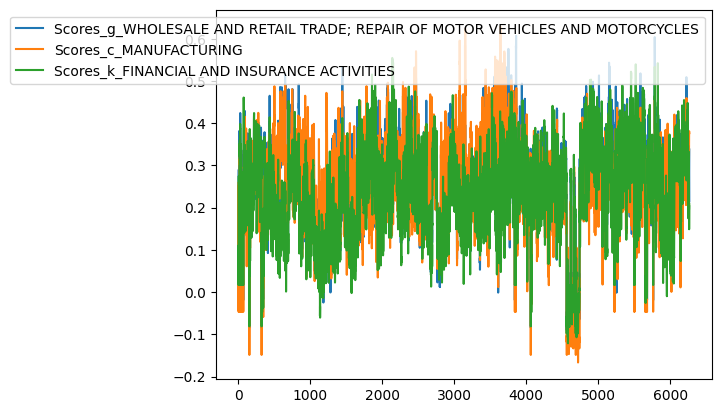

In [35]:
for score in top3_cols.index: 

    plt.plot(df[score], label= score)

plt.legend()

### Visualize mean scores

/Users/hendrikweichel/projects/NaceCodeClassification/nace_report_topic_analysis_3/analysis_functions.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_temp.columns, rotation=90)
/Users/hendrikweichel/projects/NaceCodeClassification/nace_report_topic_analysis_3/analysis_functions.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_temp.columns, rotation=90)
/Users/hendrikweichel/projects/NaceCodeClassification/nace_report_topic_analysis_3/analysis_functions.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_temp.columns, rotation=90)
/Users/hendrikweichel/projects/NaceCodeClassification/nace_report_topic_analysis_3/analysis_functions.py:32: UserWarning: set_ticklabels

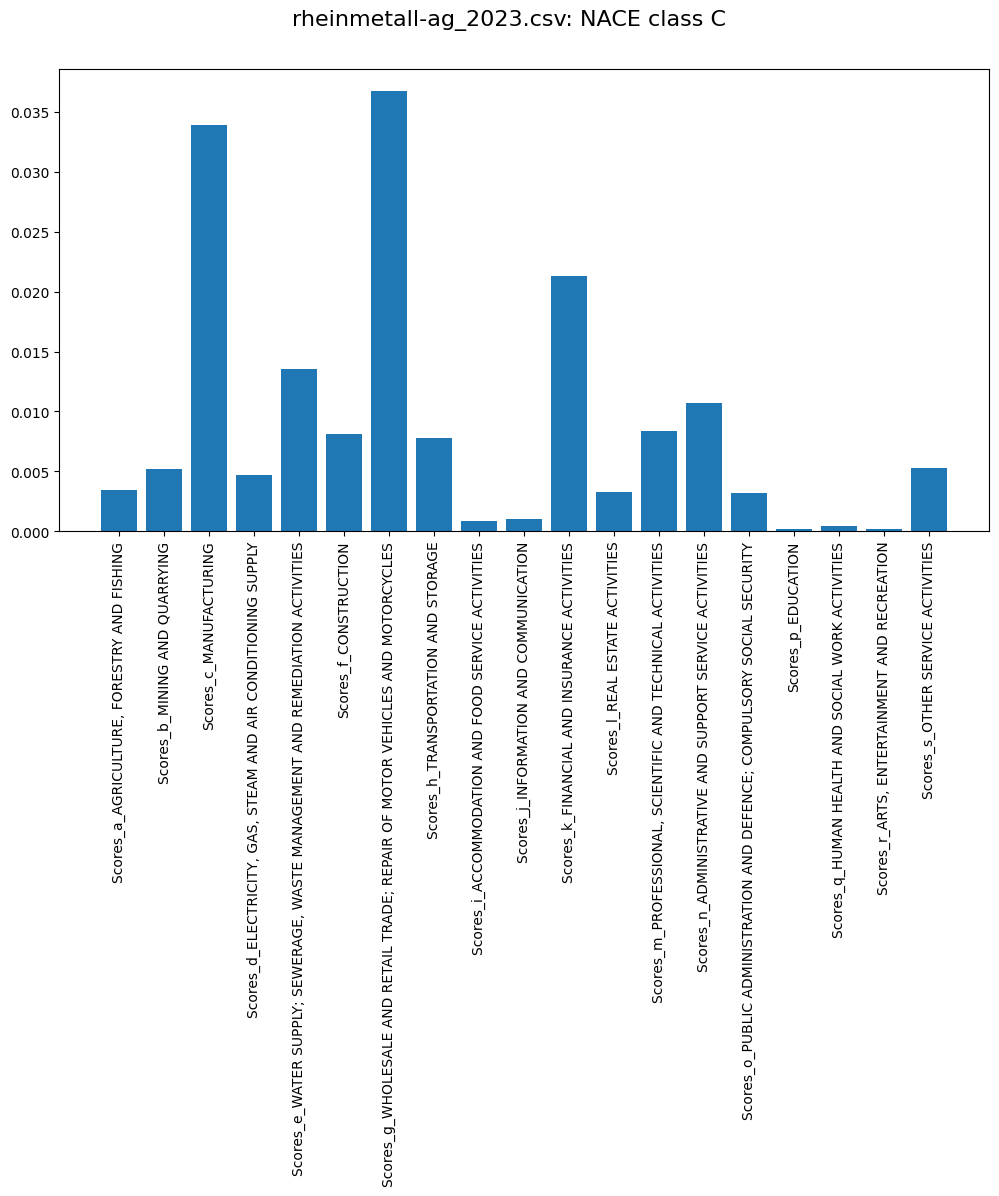

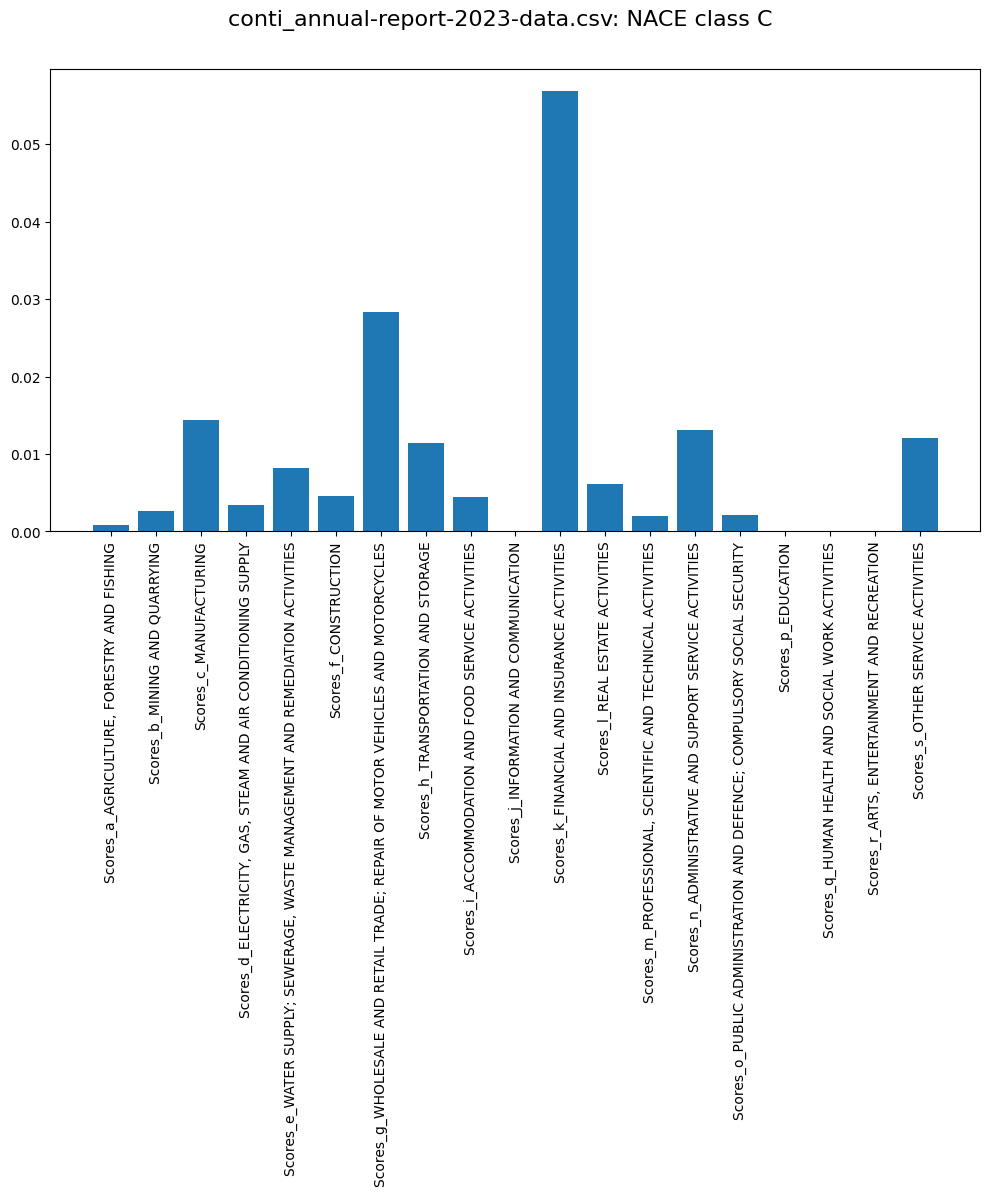

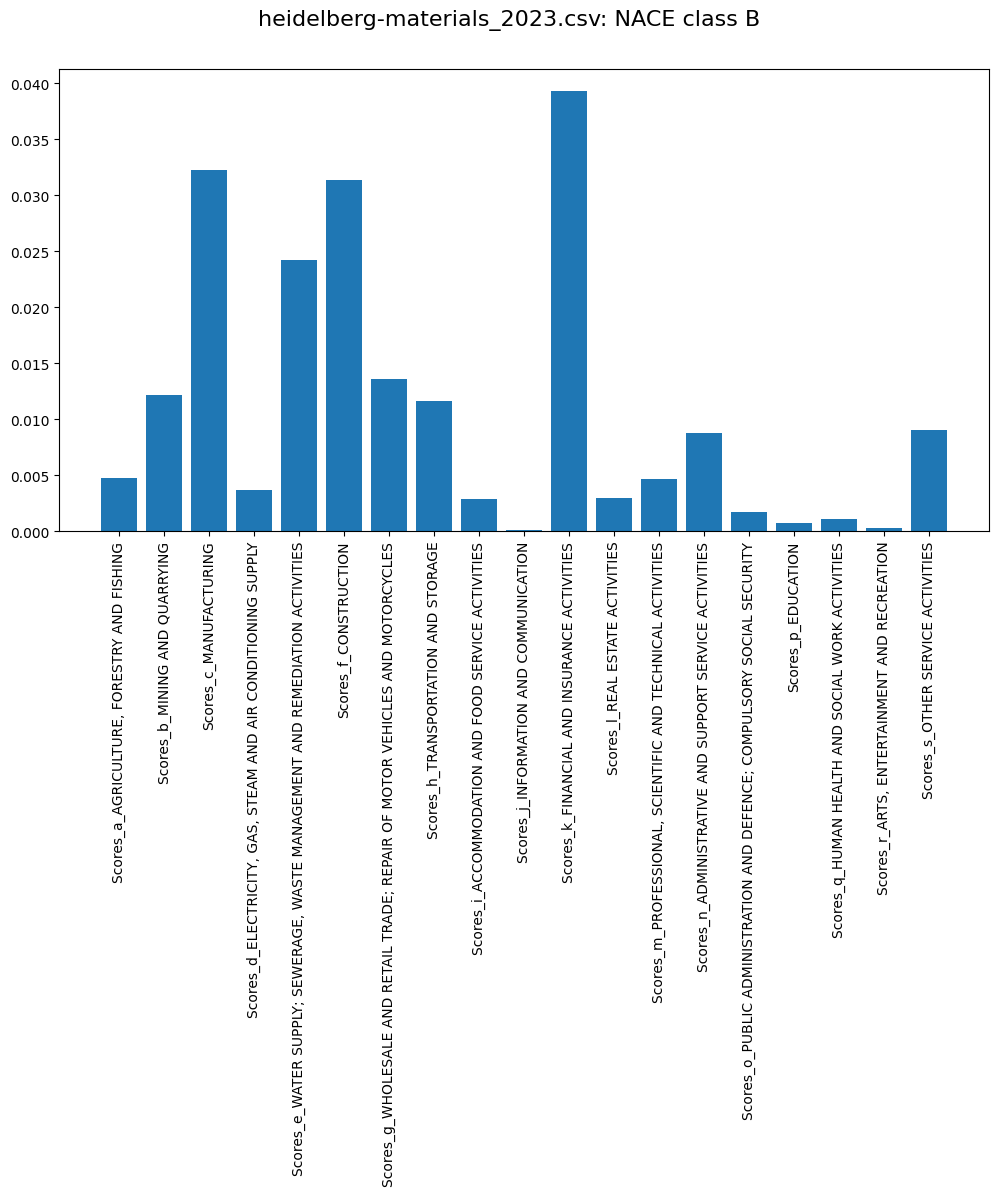

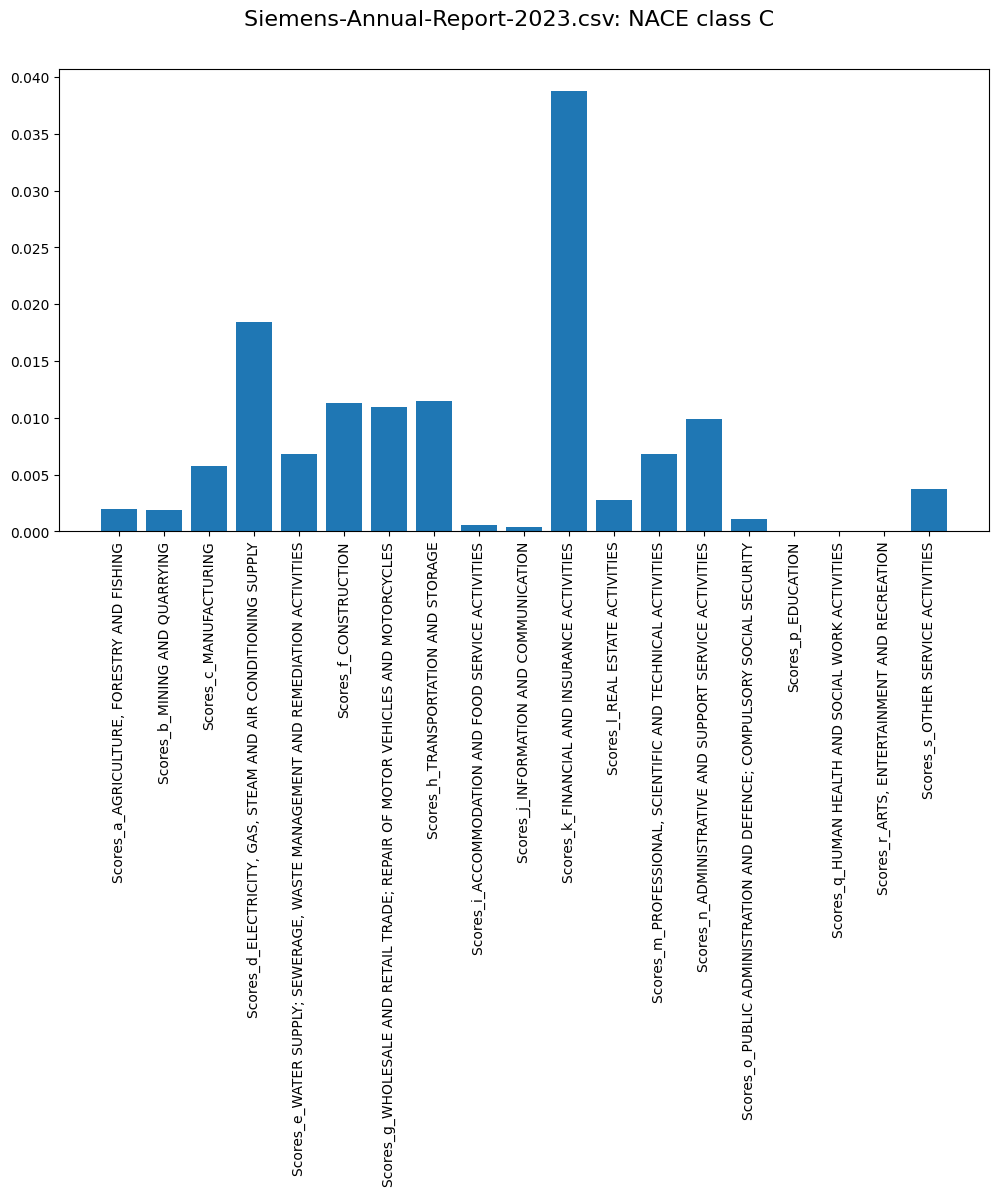

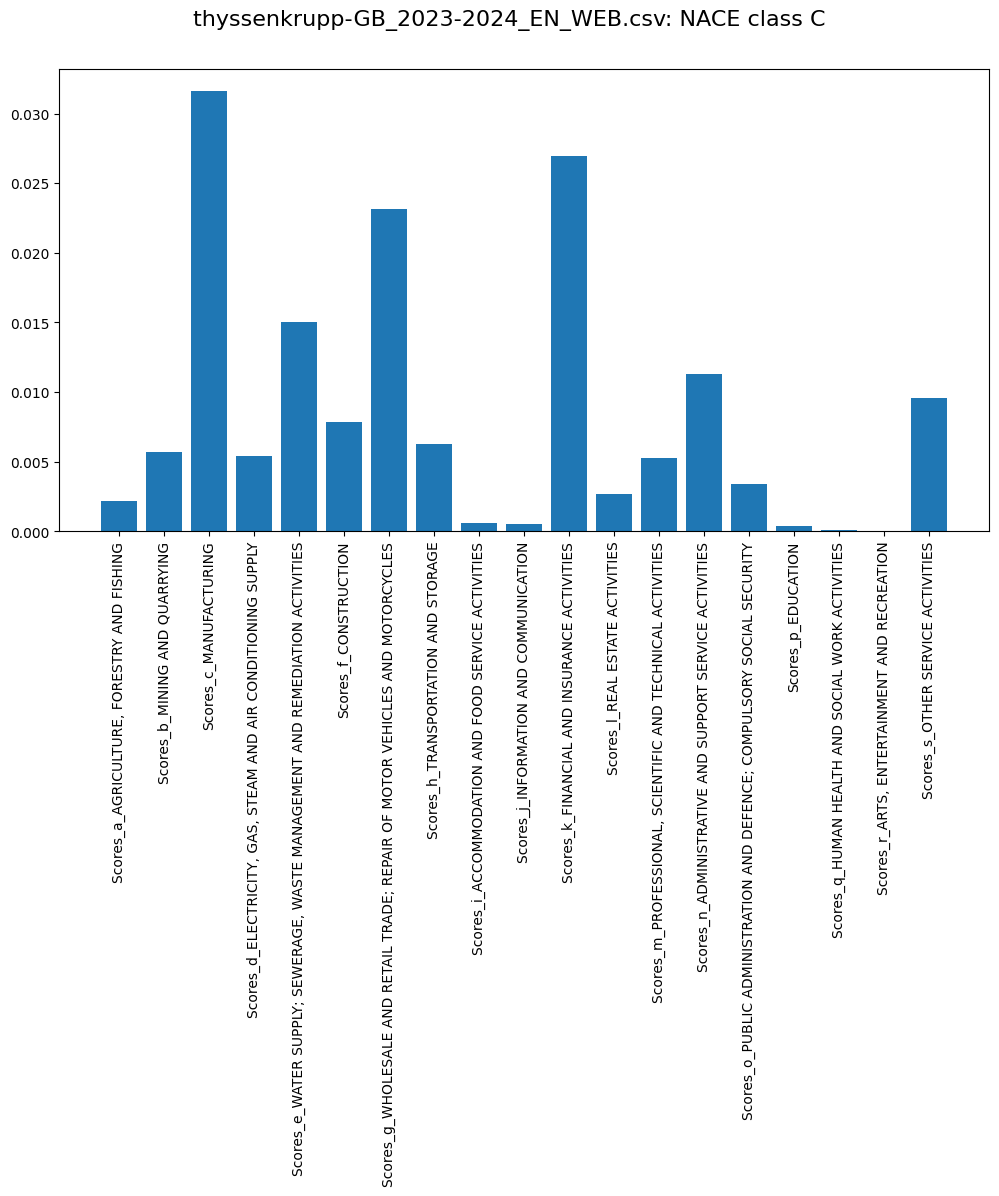

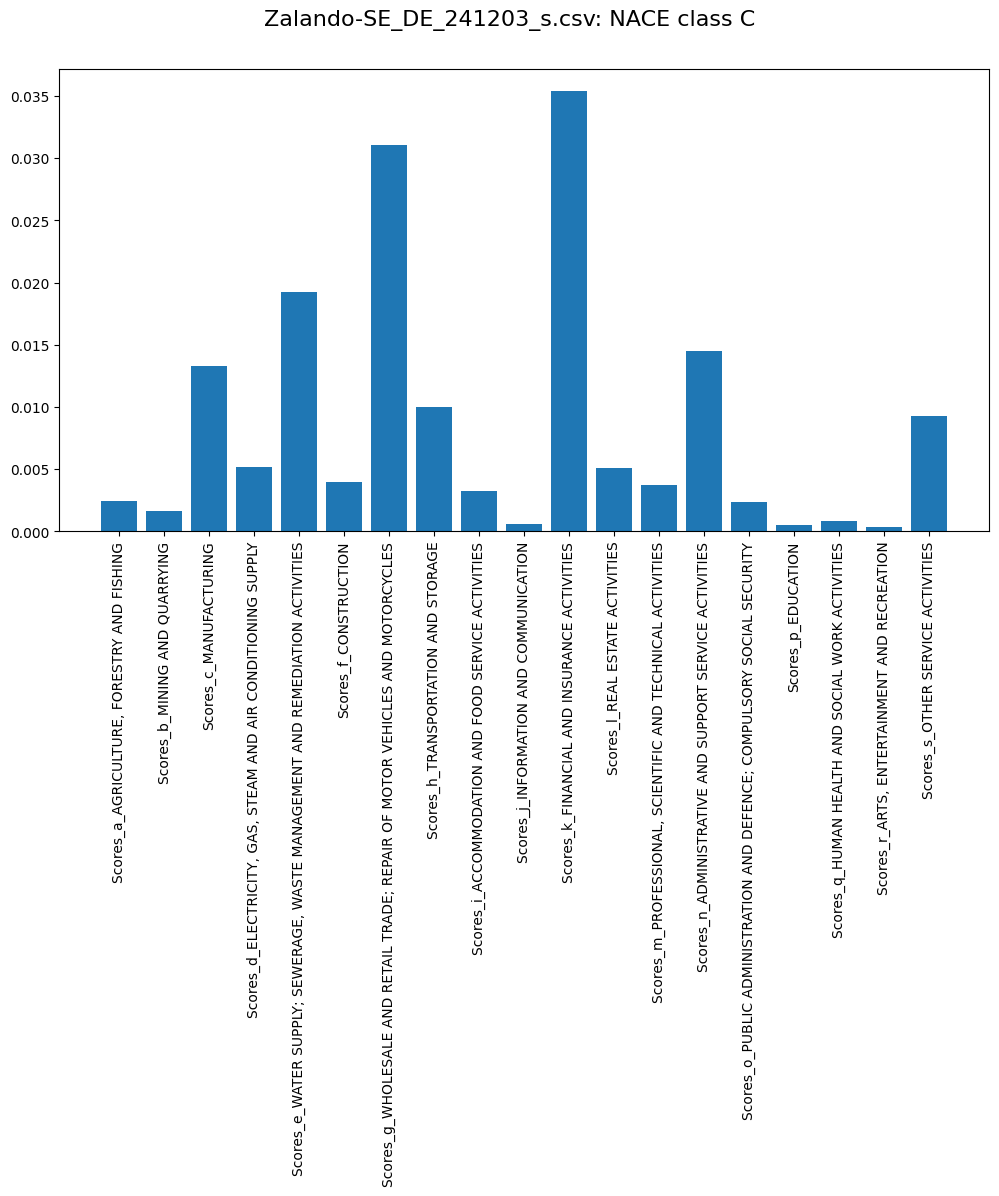

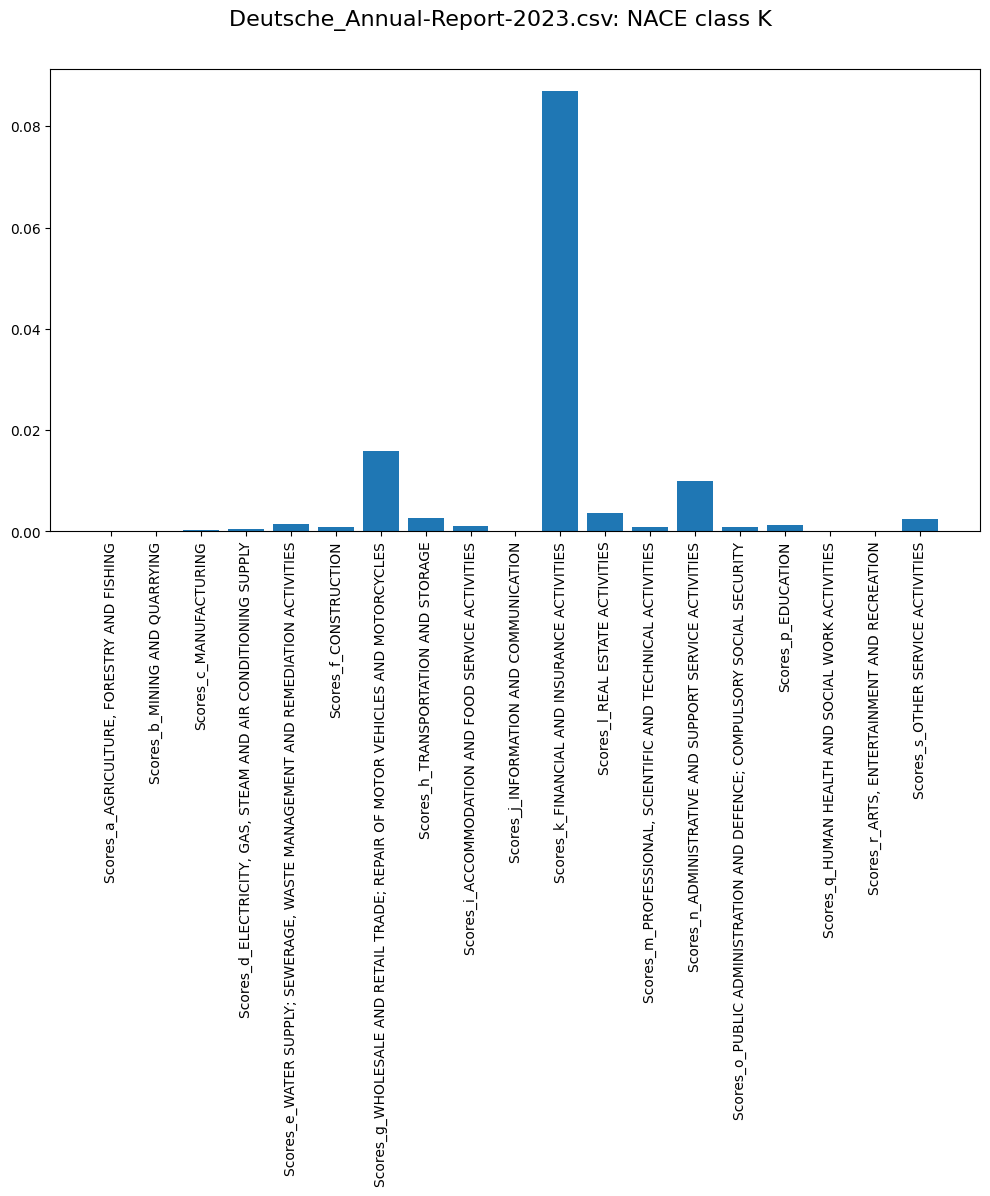

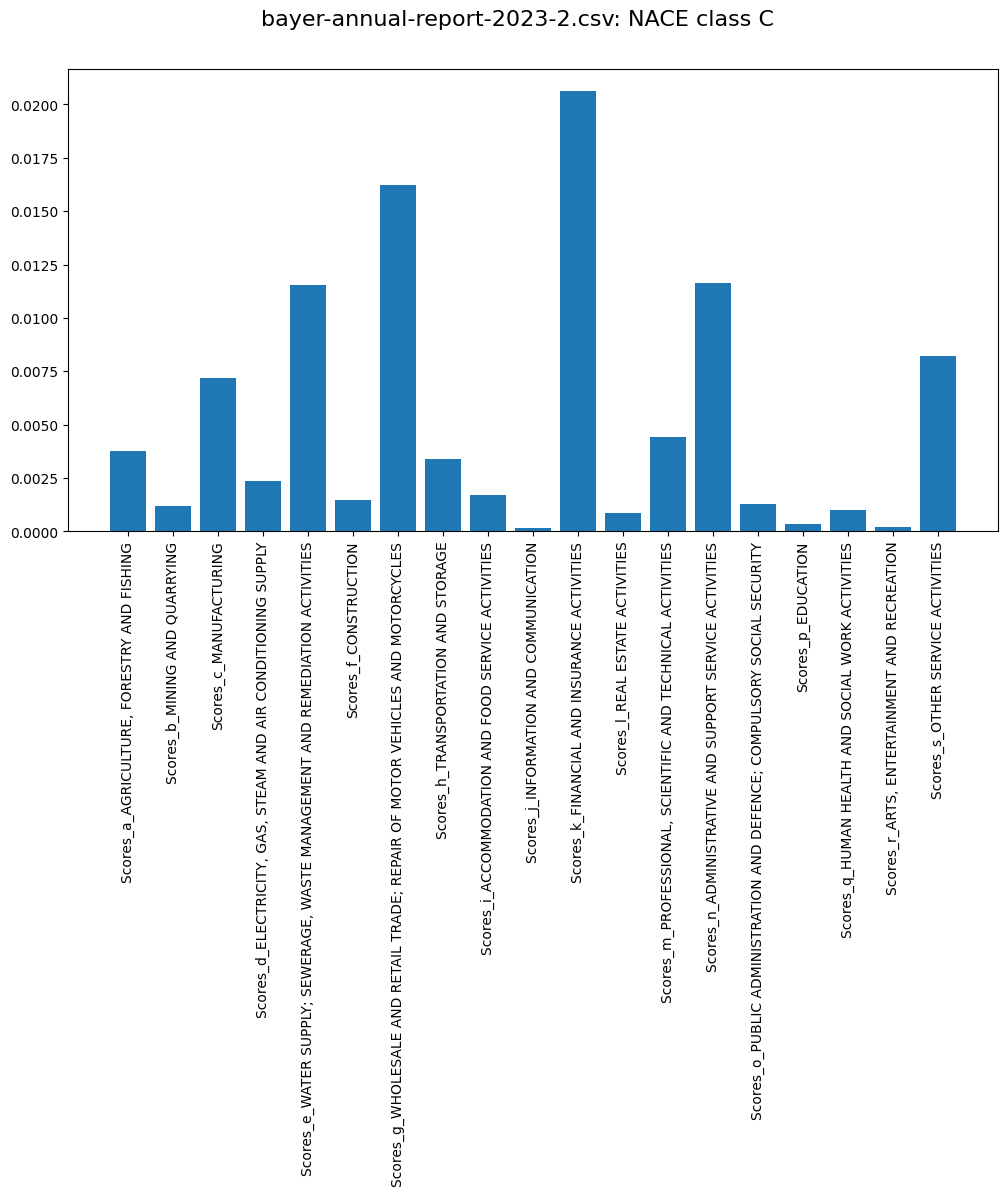

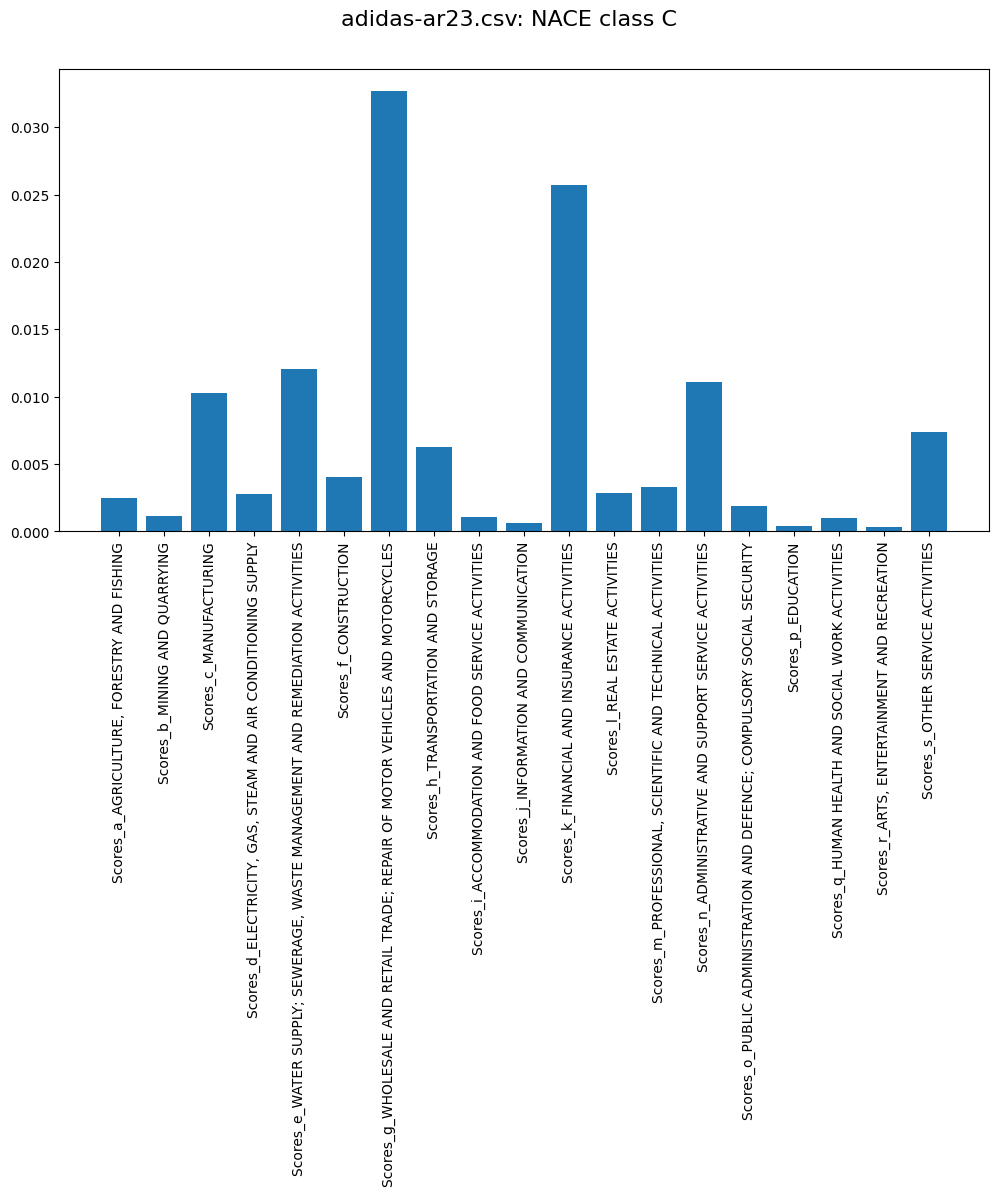

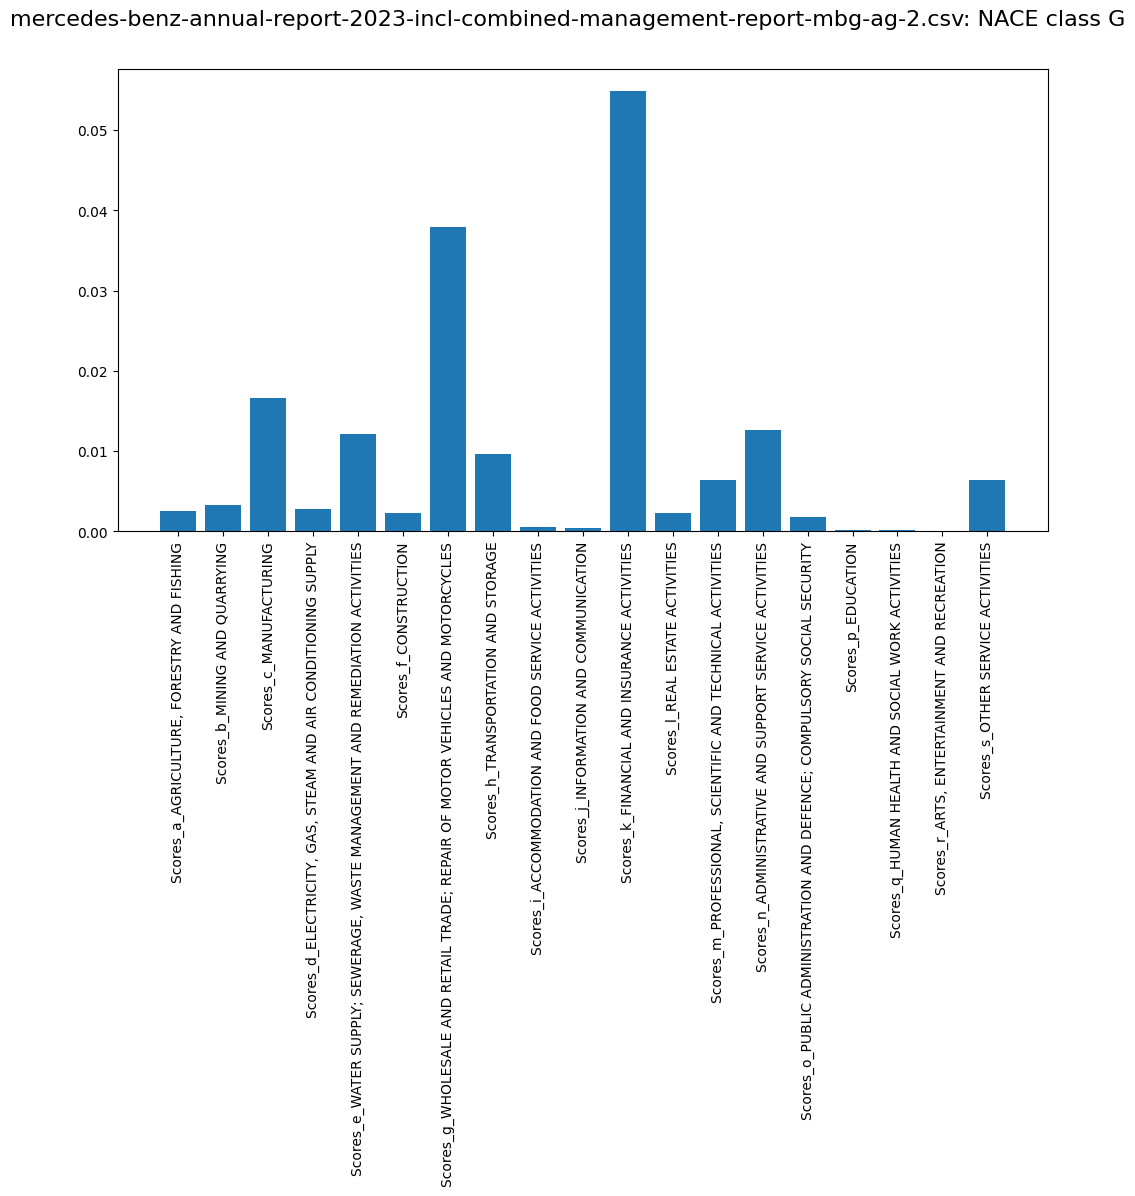

In [36]:
for i in range(len(df_paragraph_similarities)):
    analysis_functions.plot_mean_scores(df_paragraph_similarities[i][1], cos_threshold, NACE_codes, df_paragraph_similarities[i][0])

### Visualize distributions

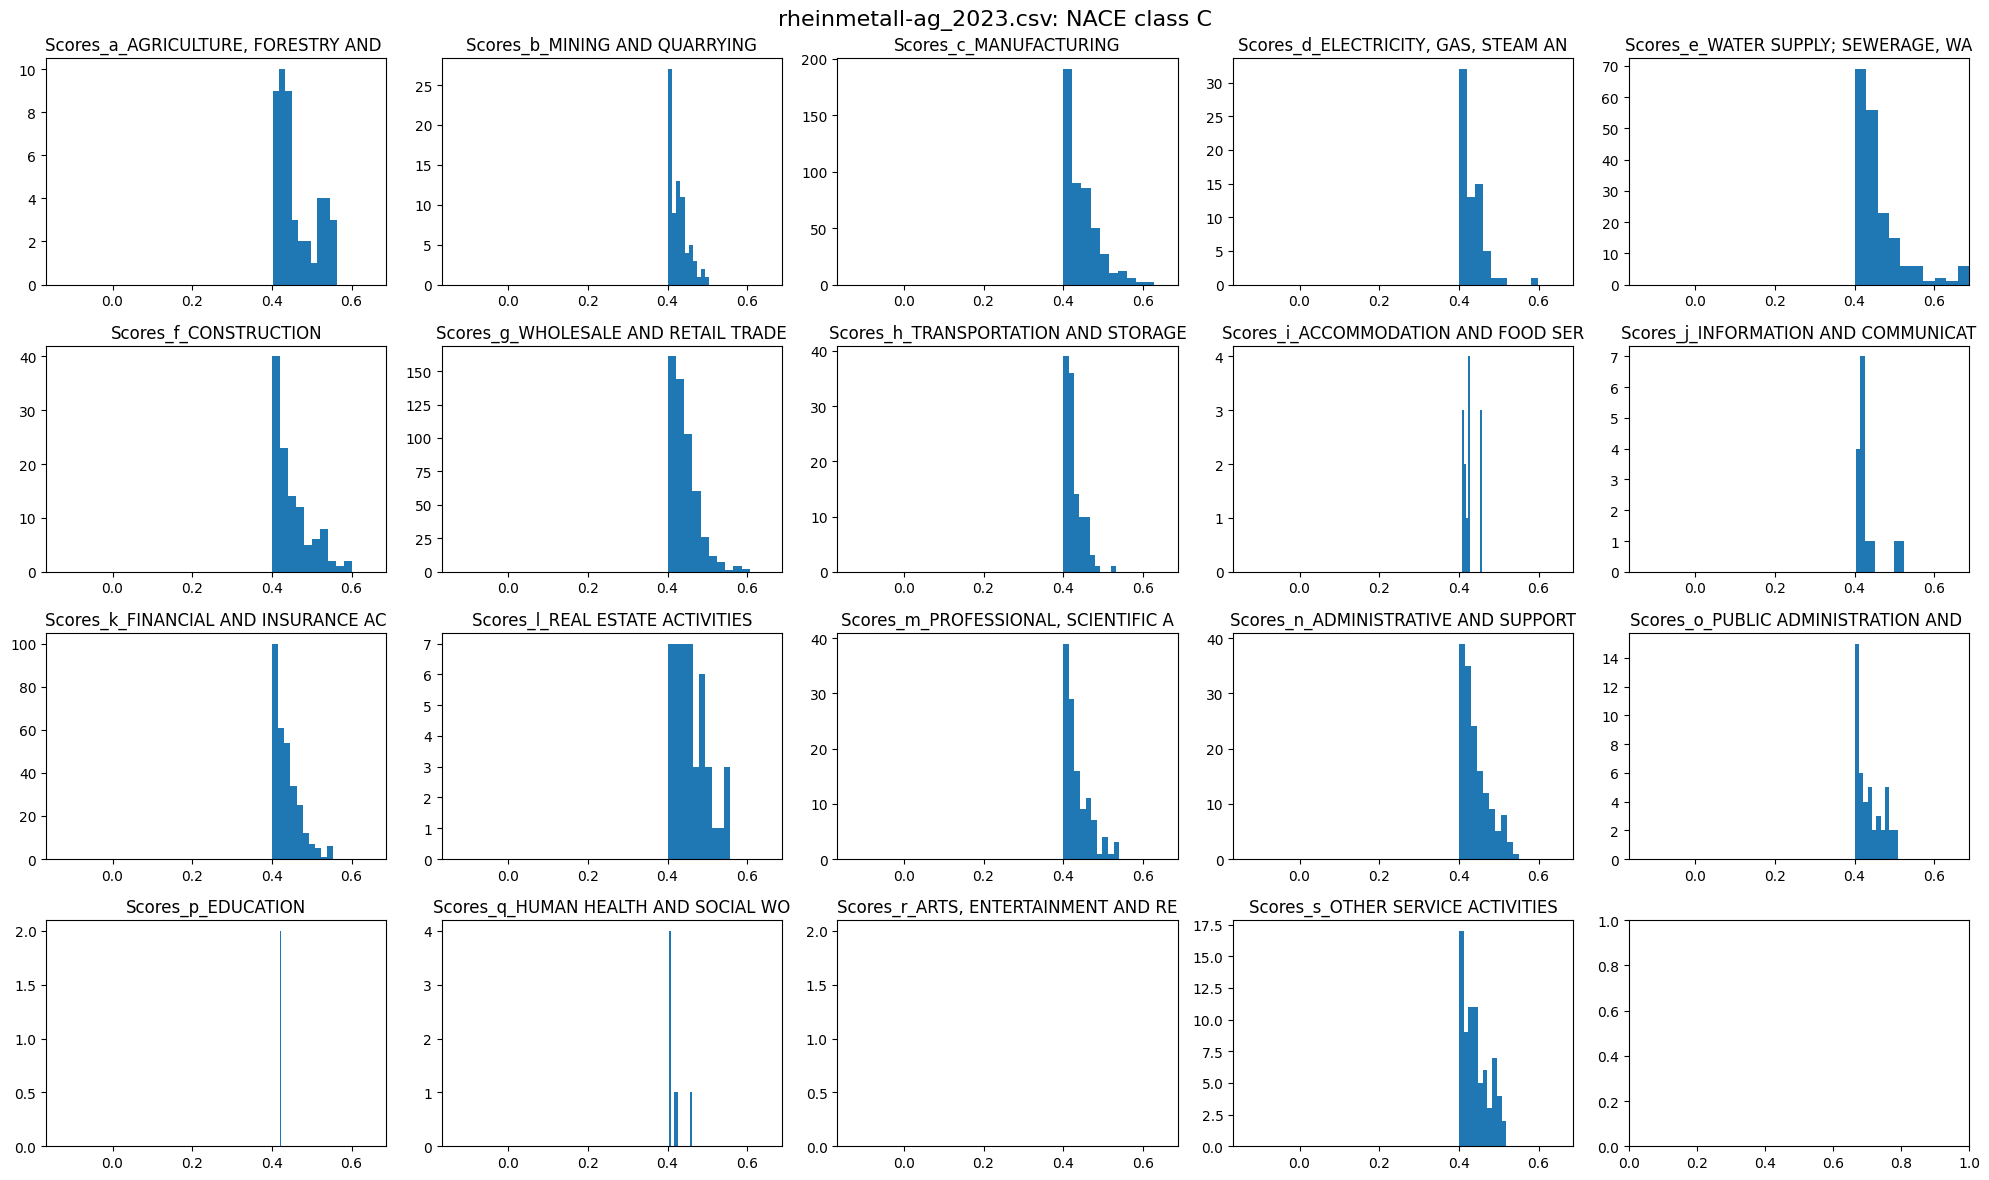

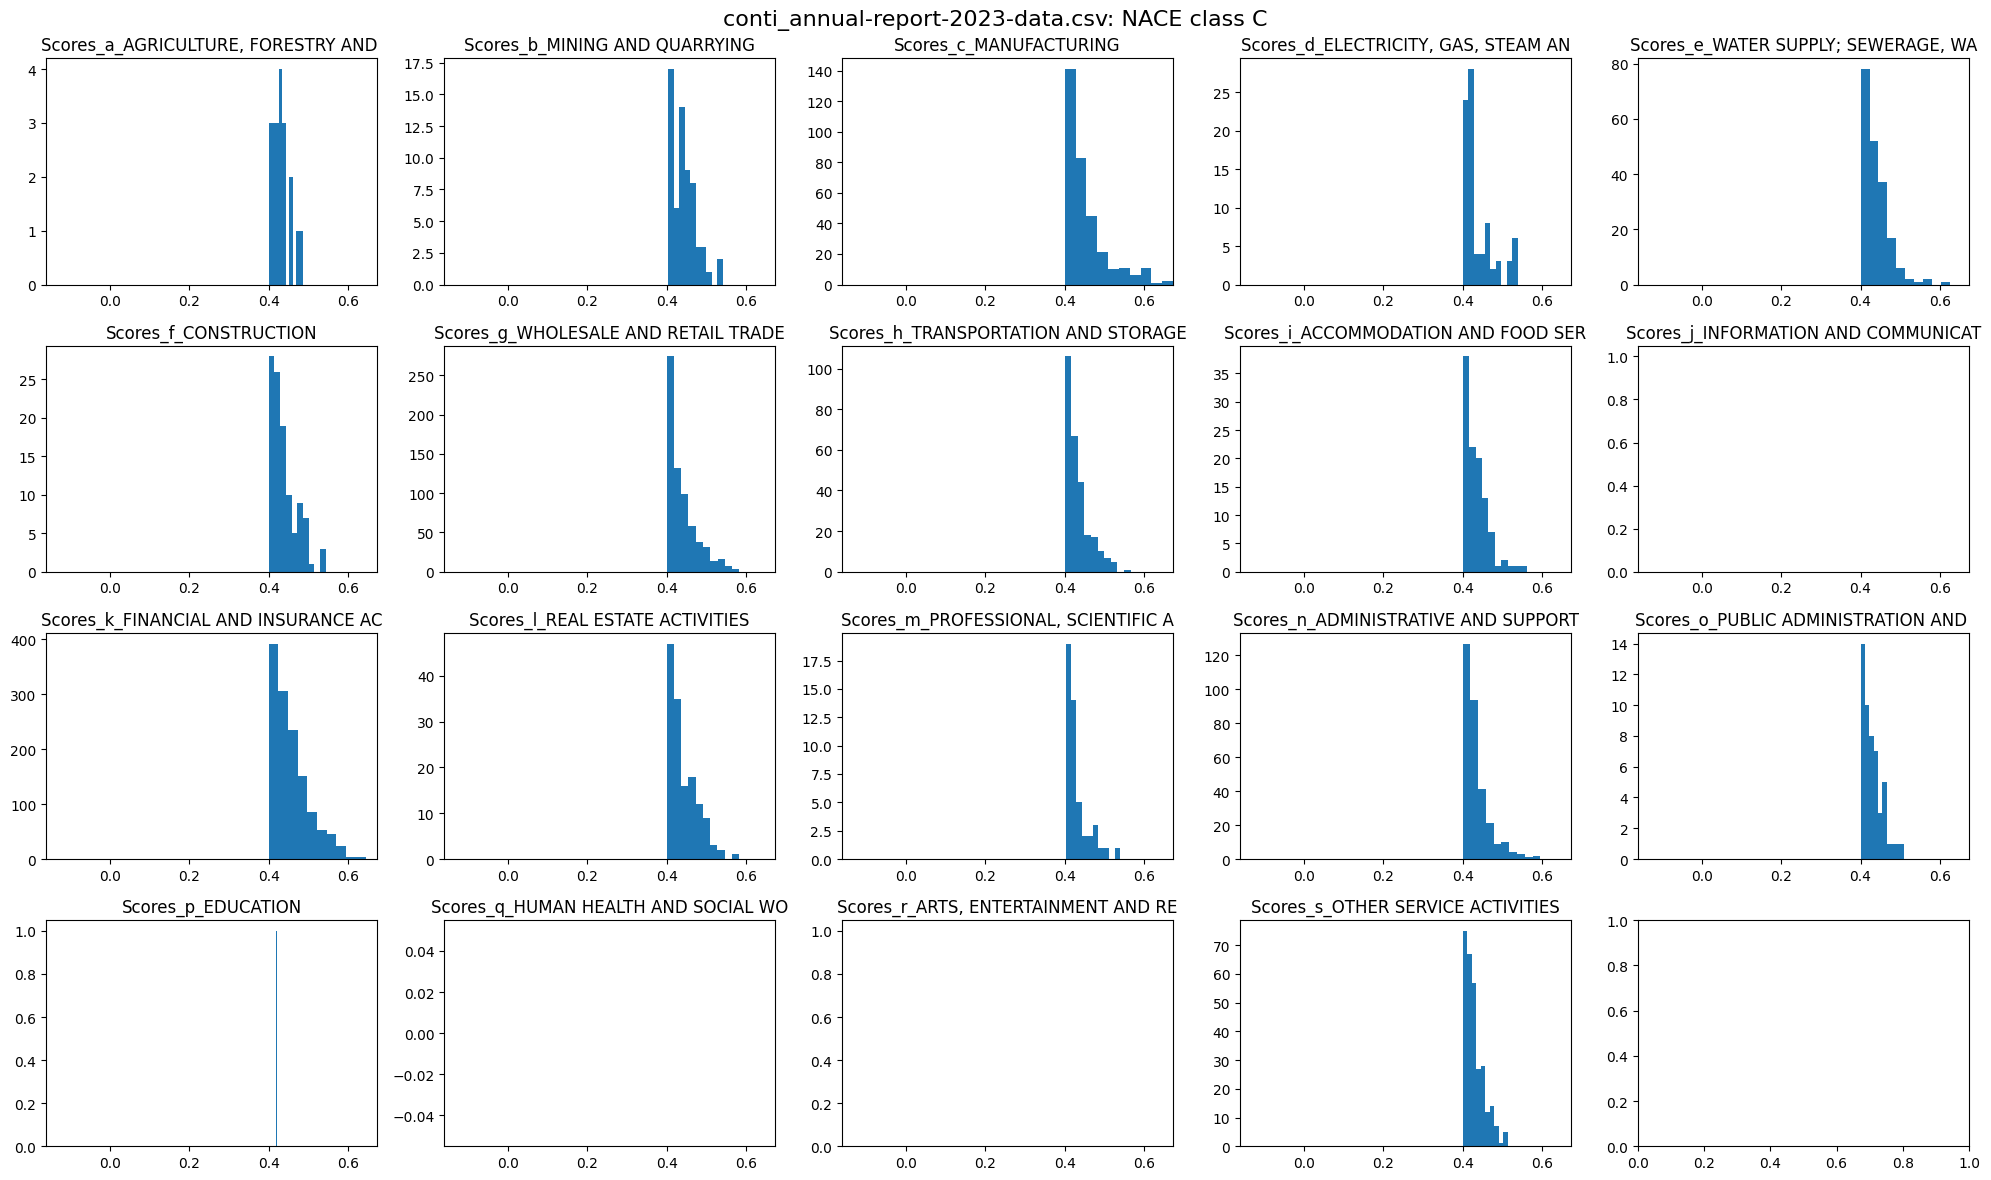

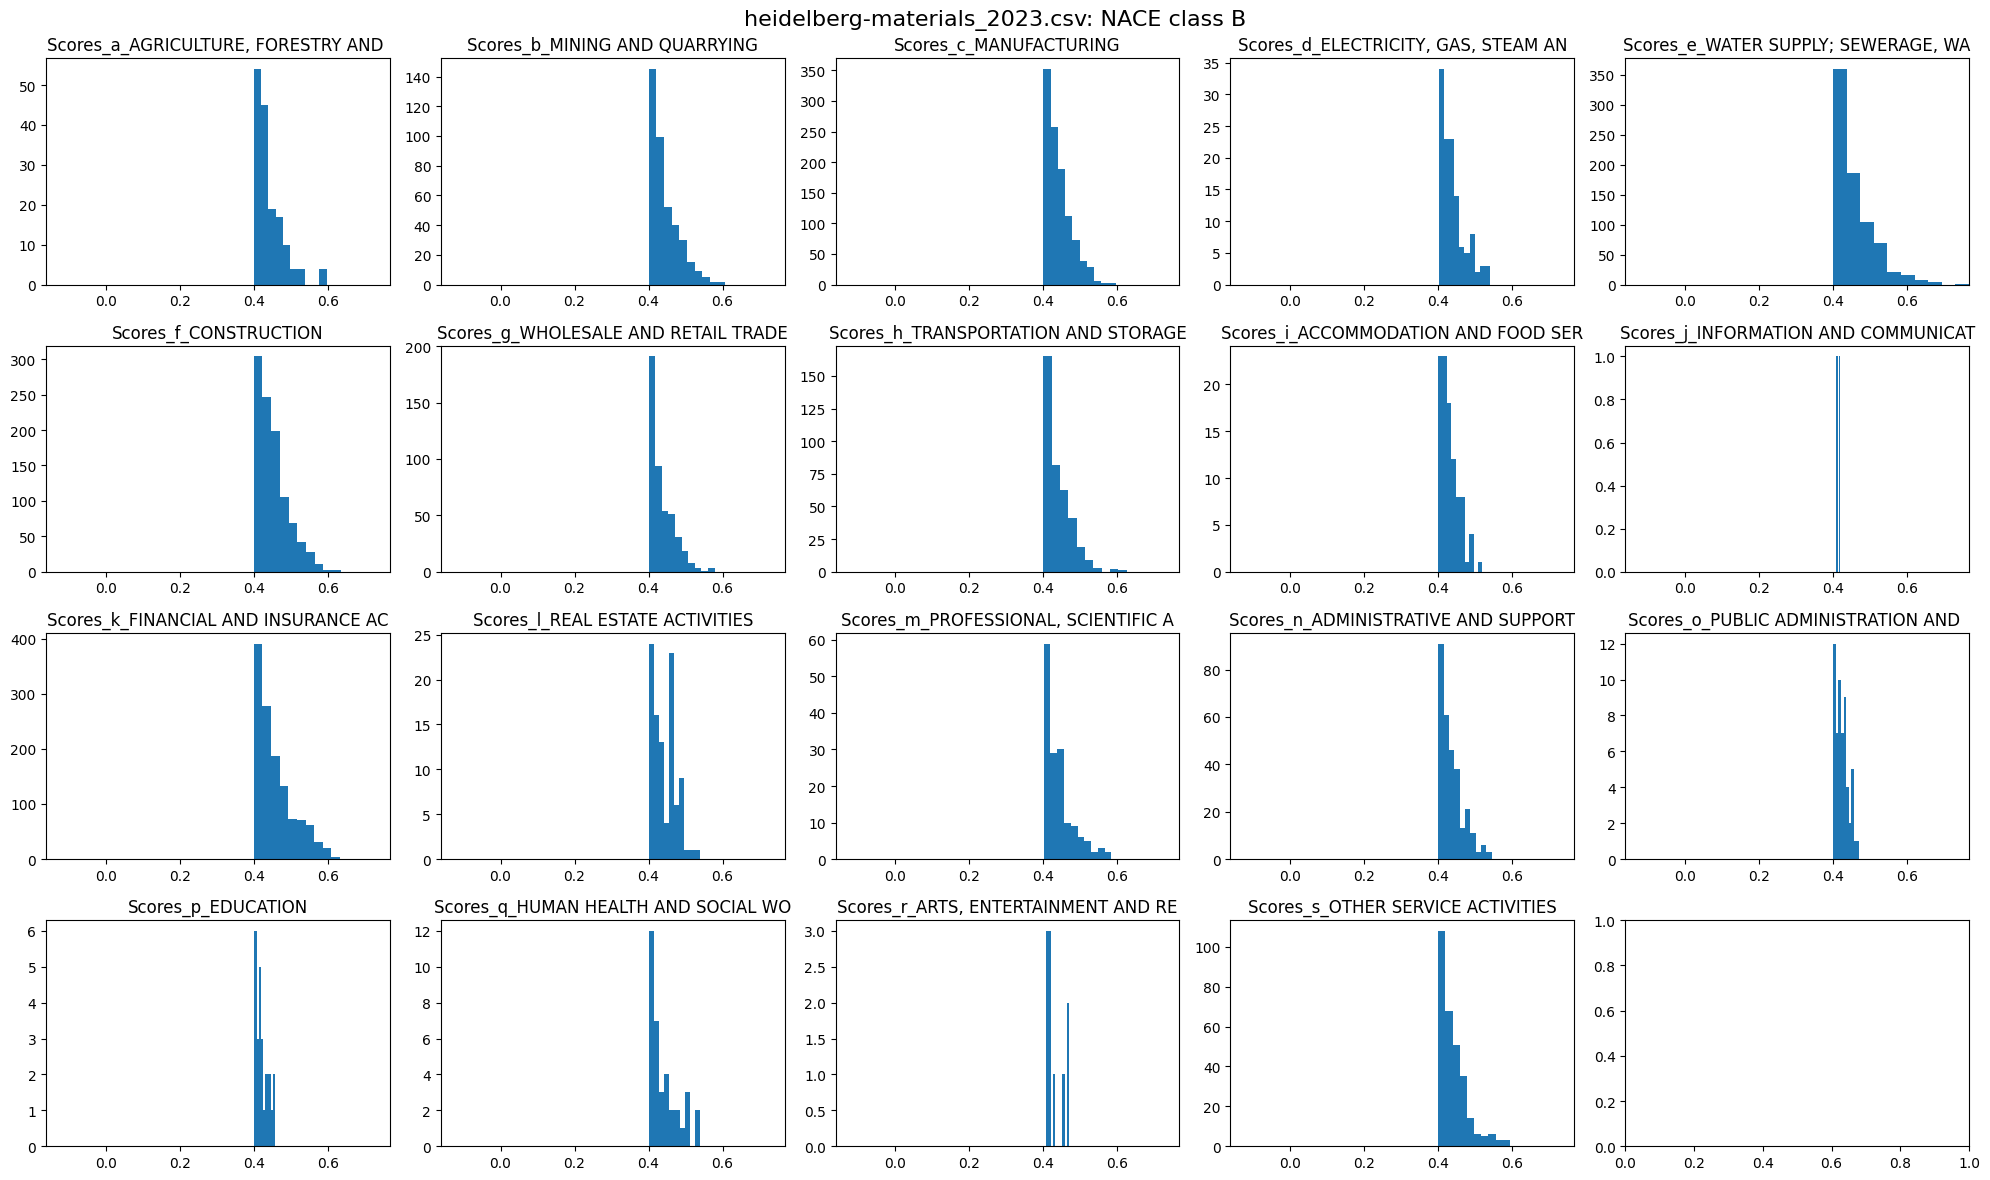

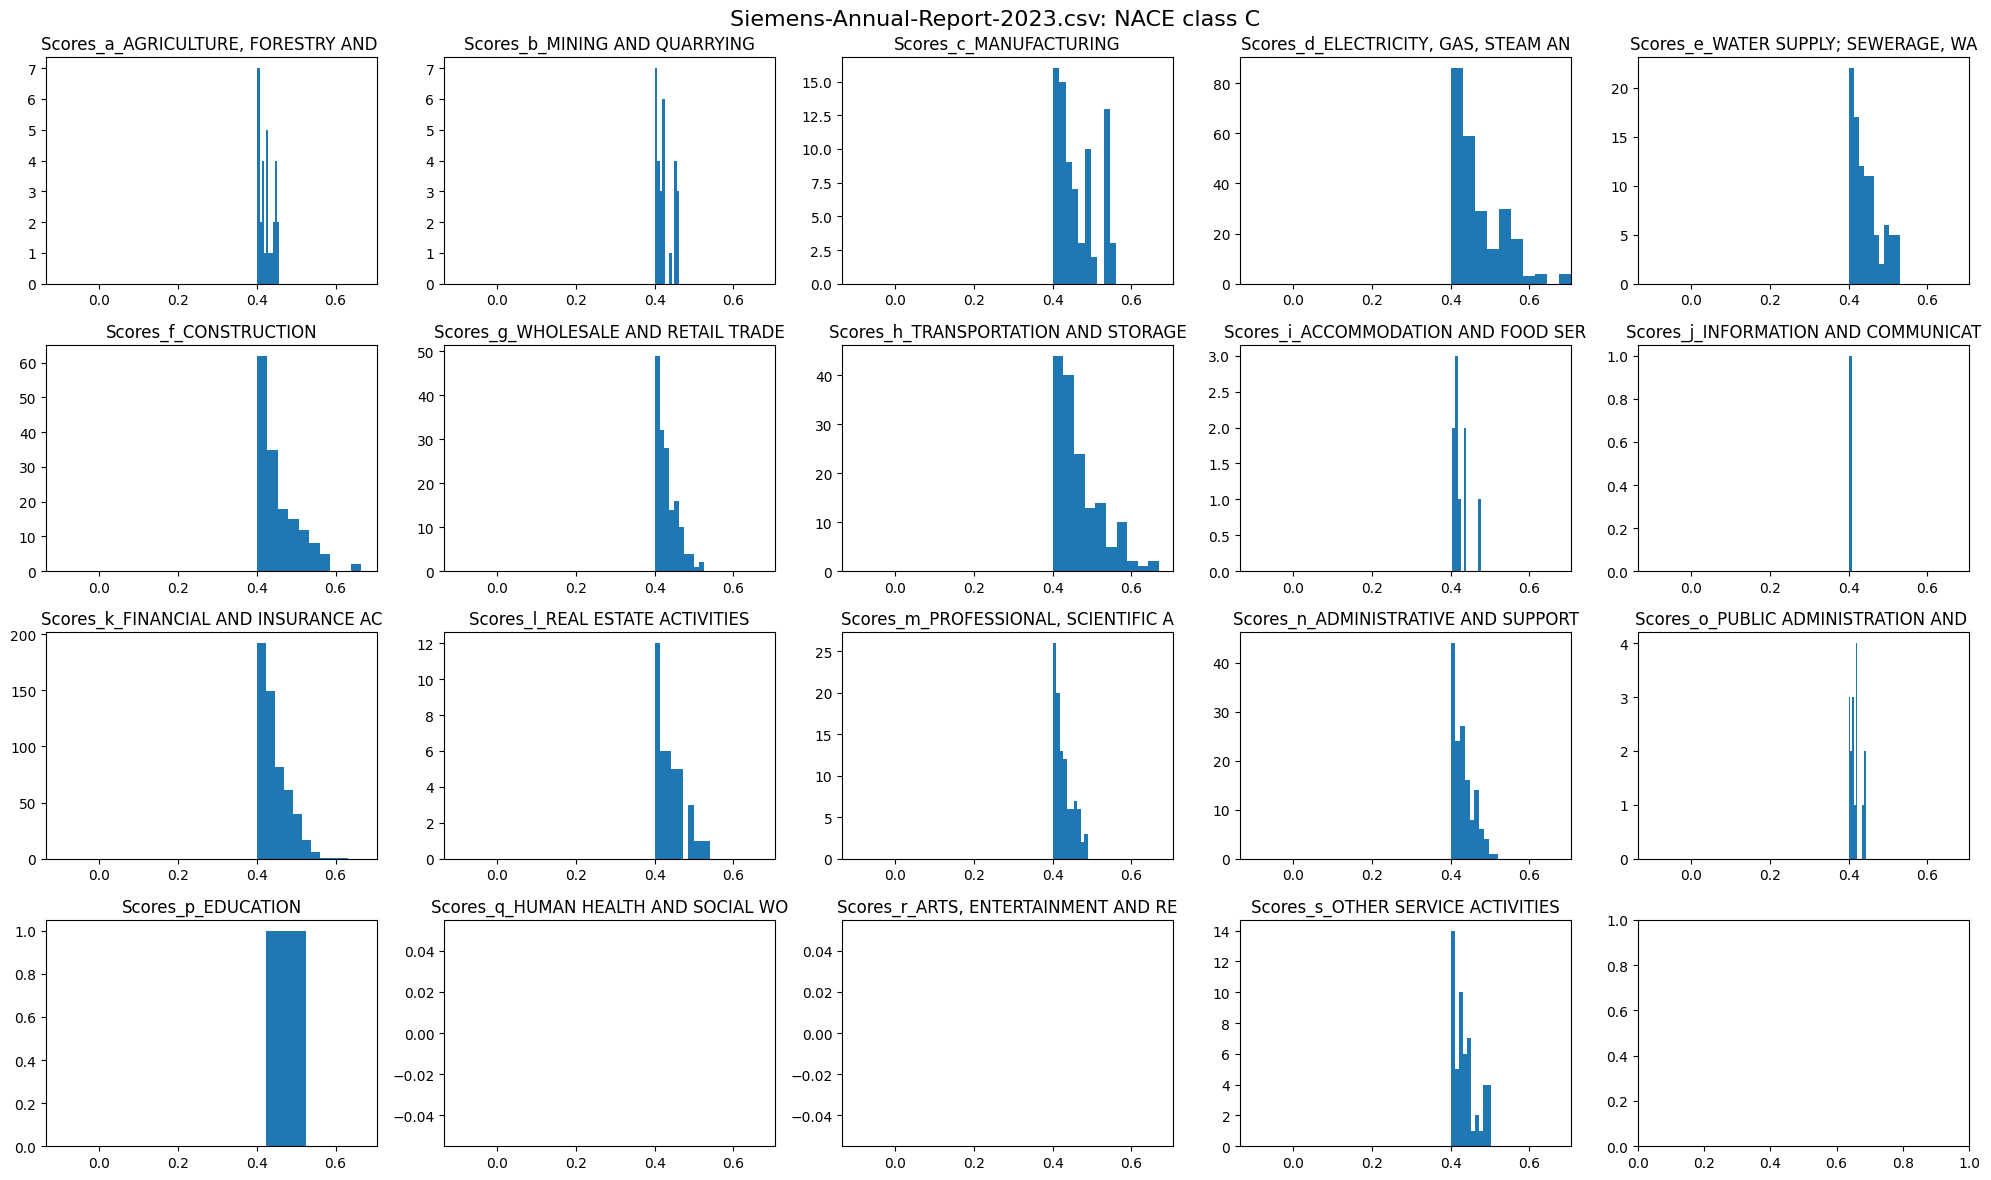

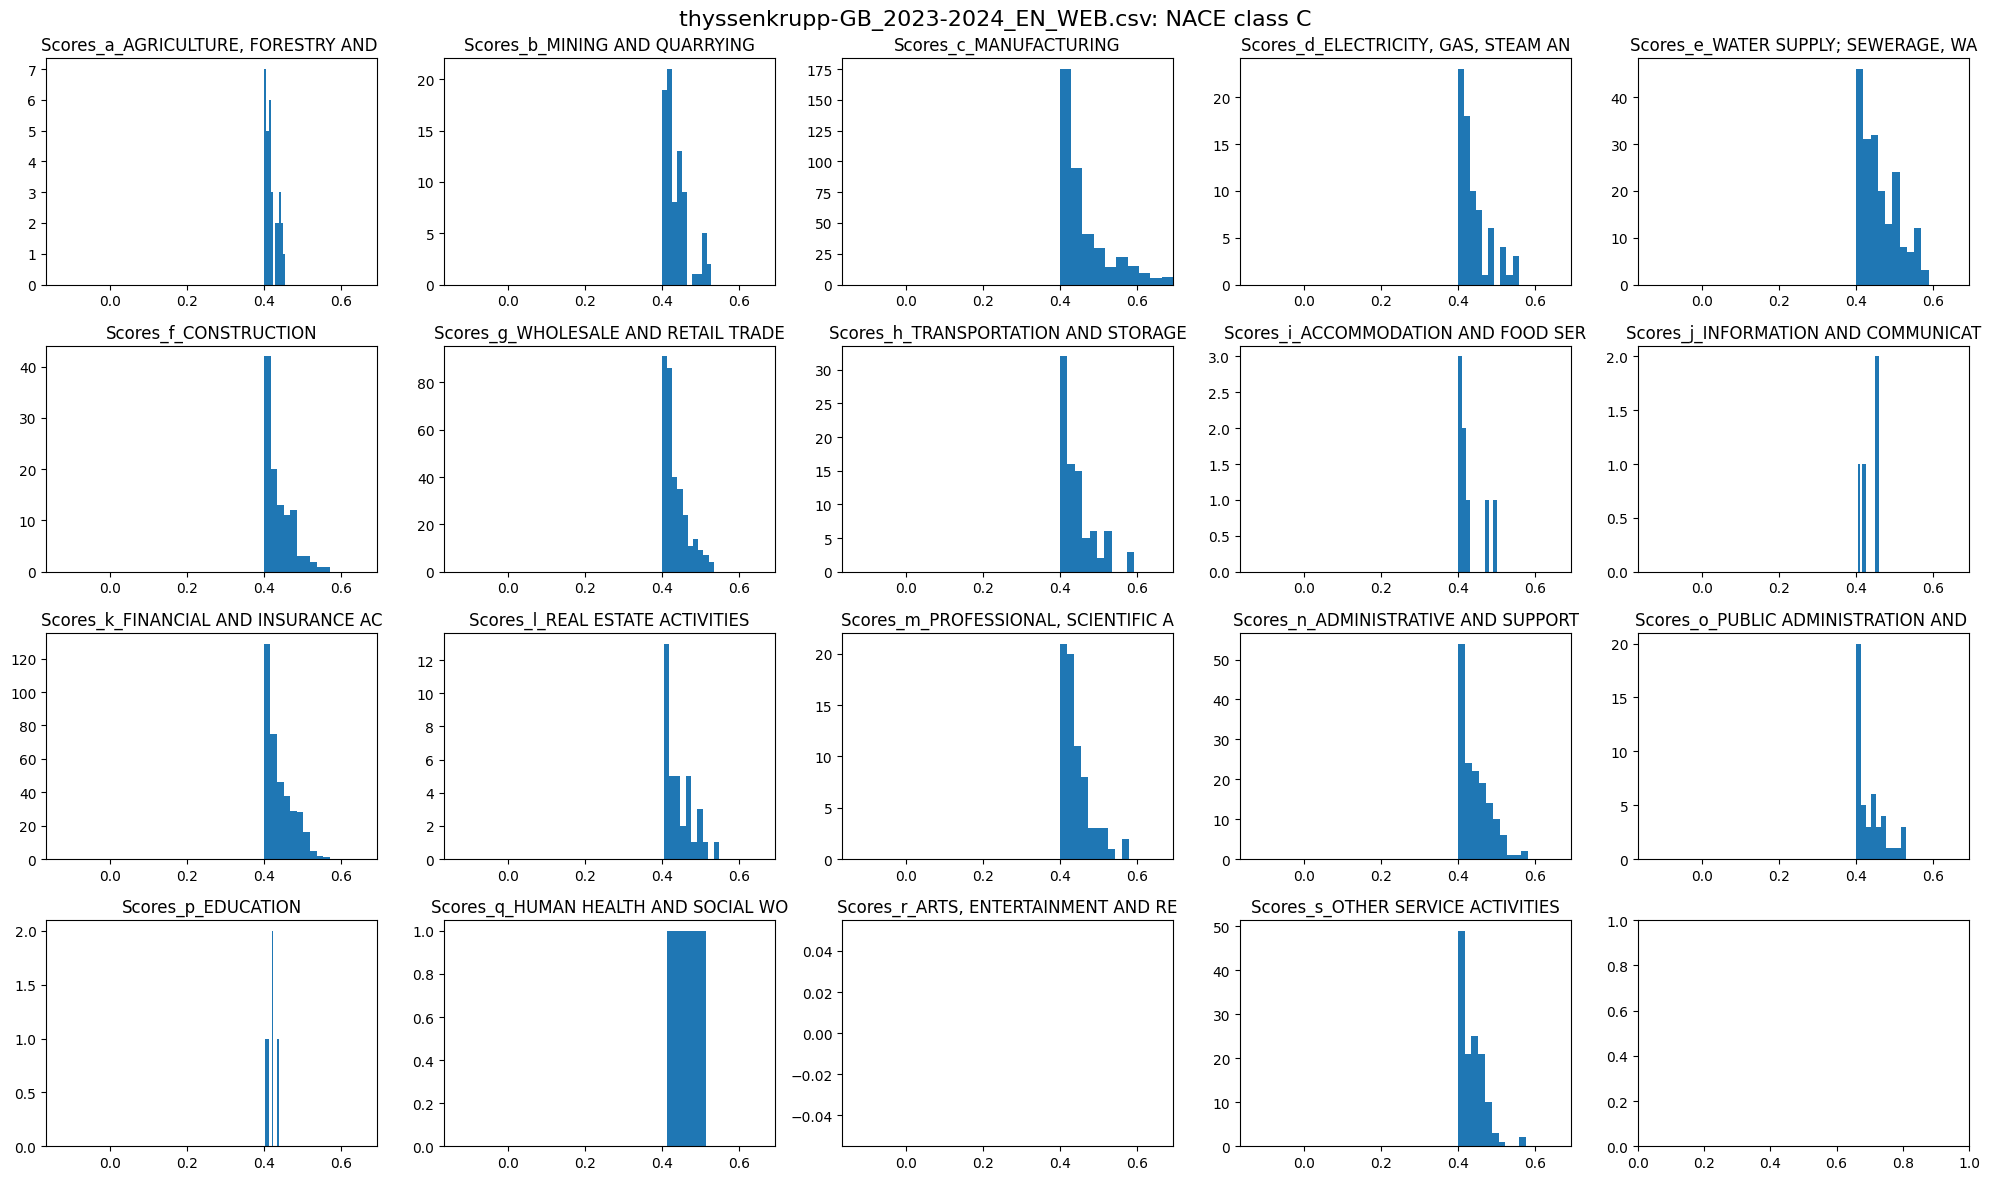

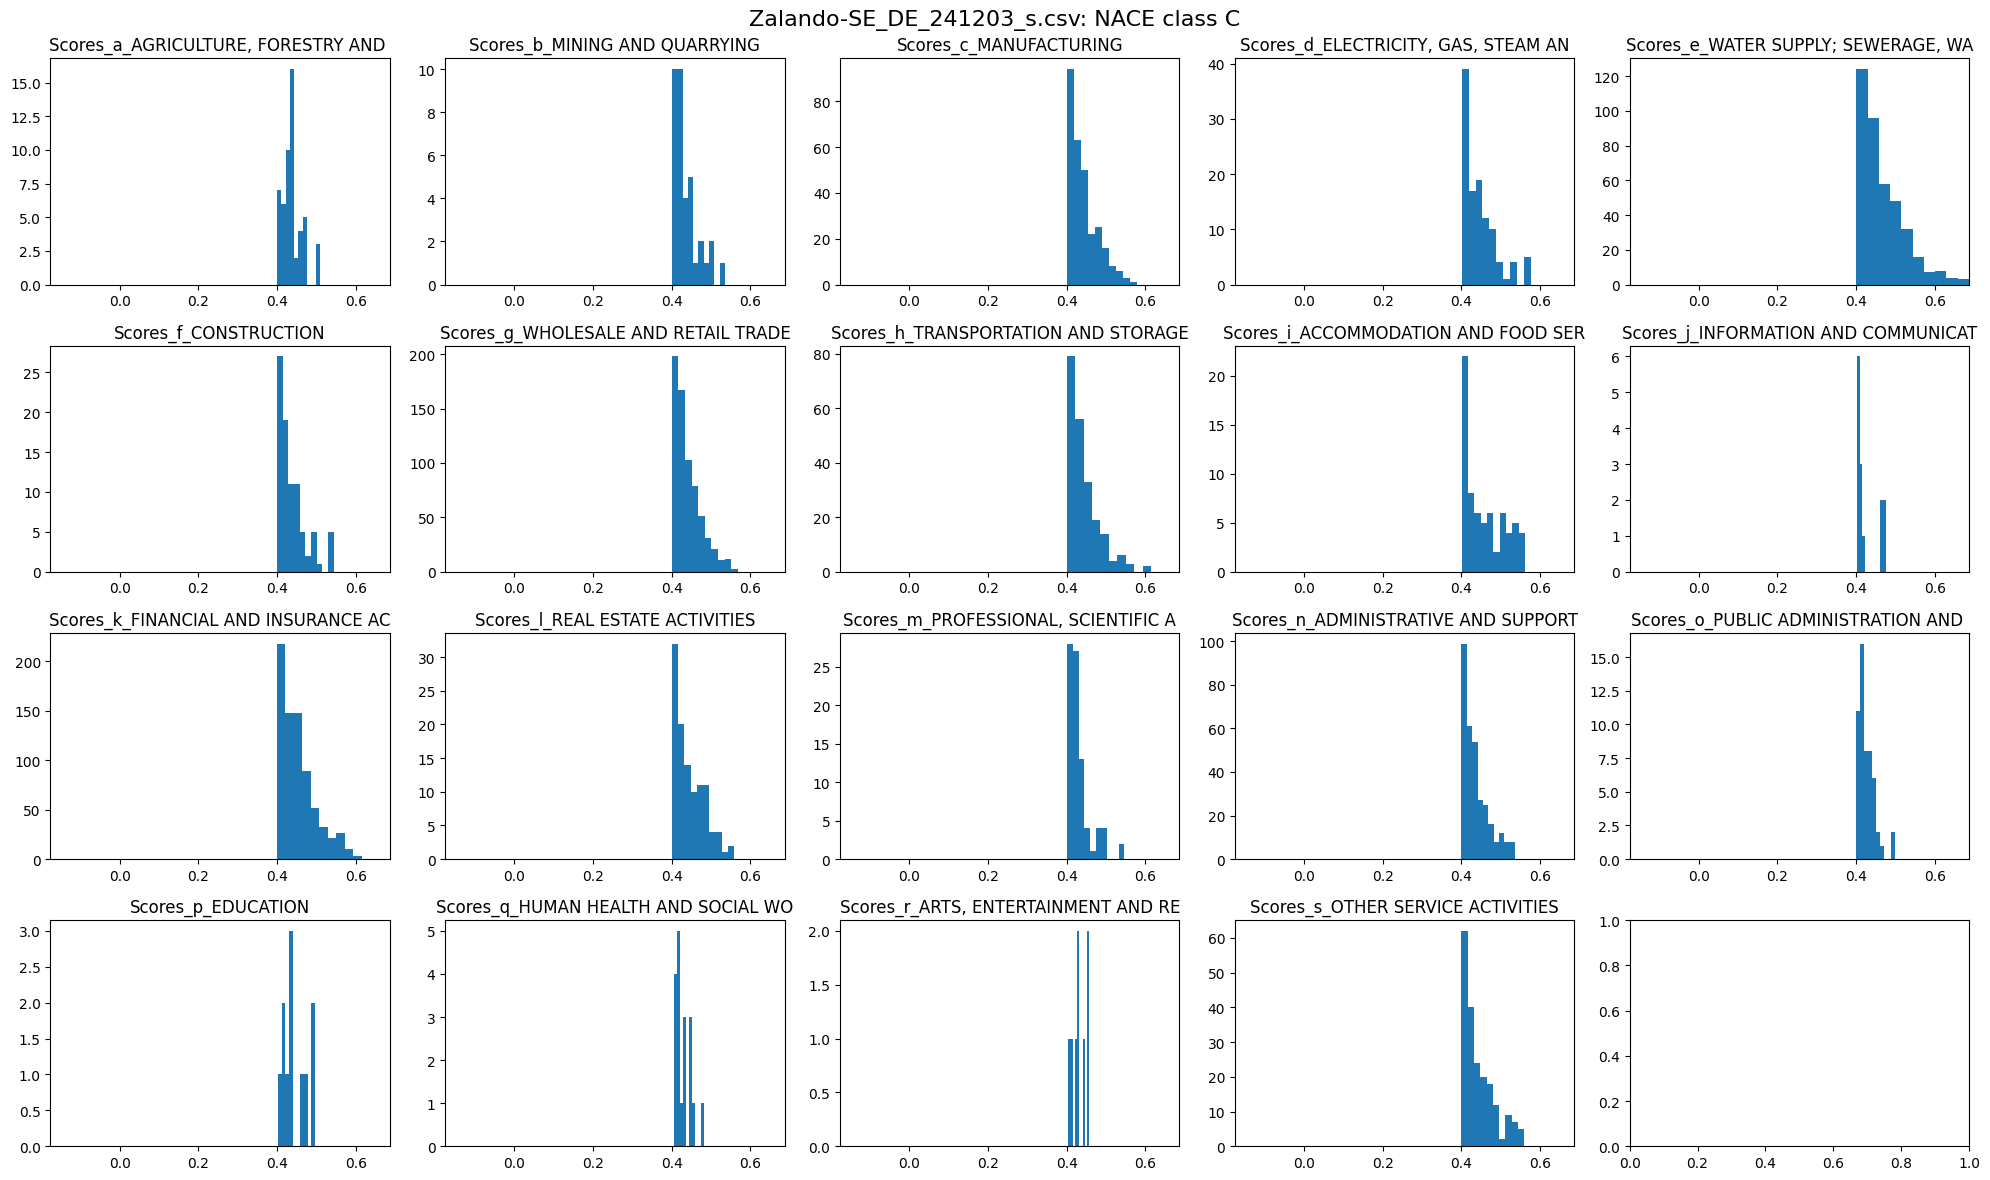

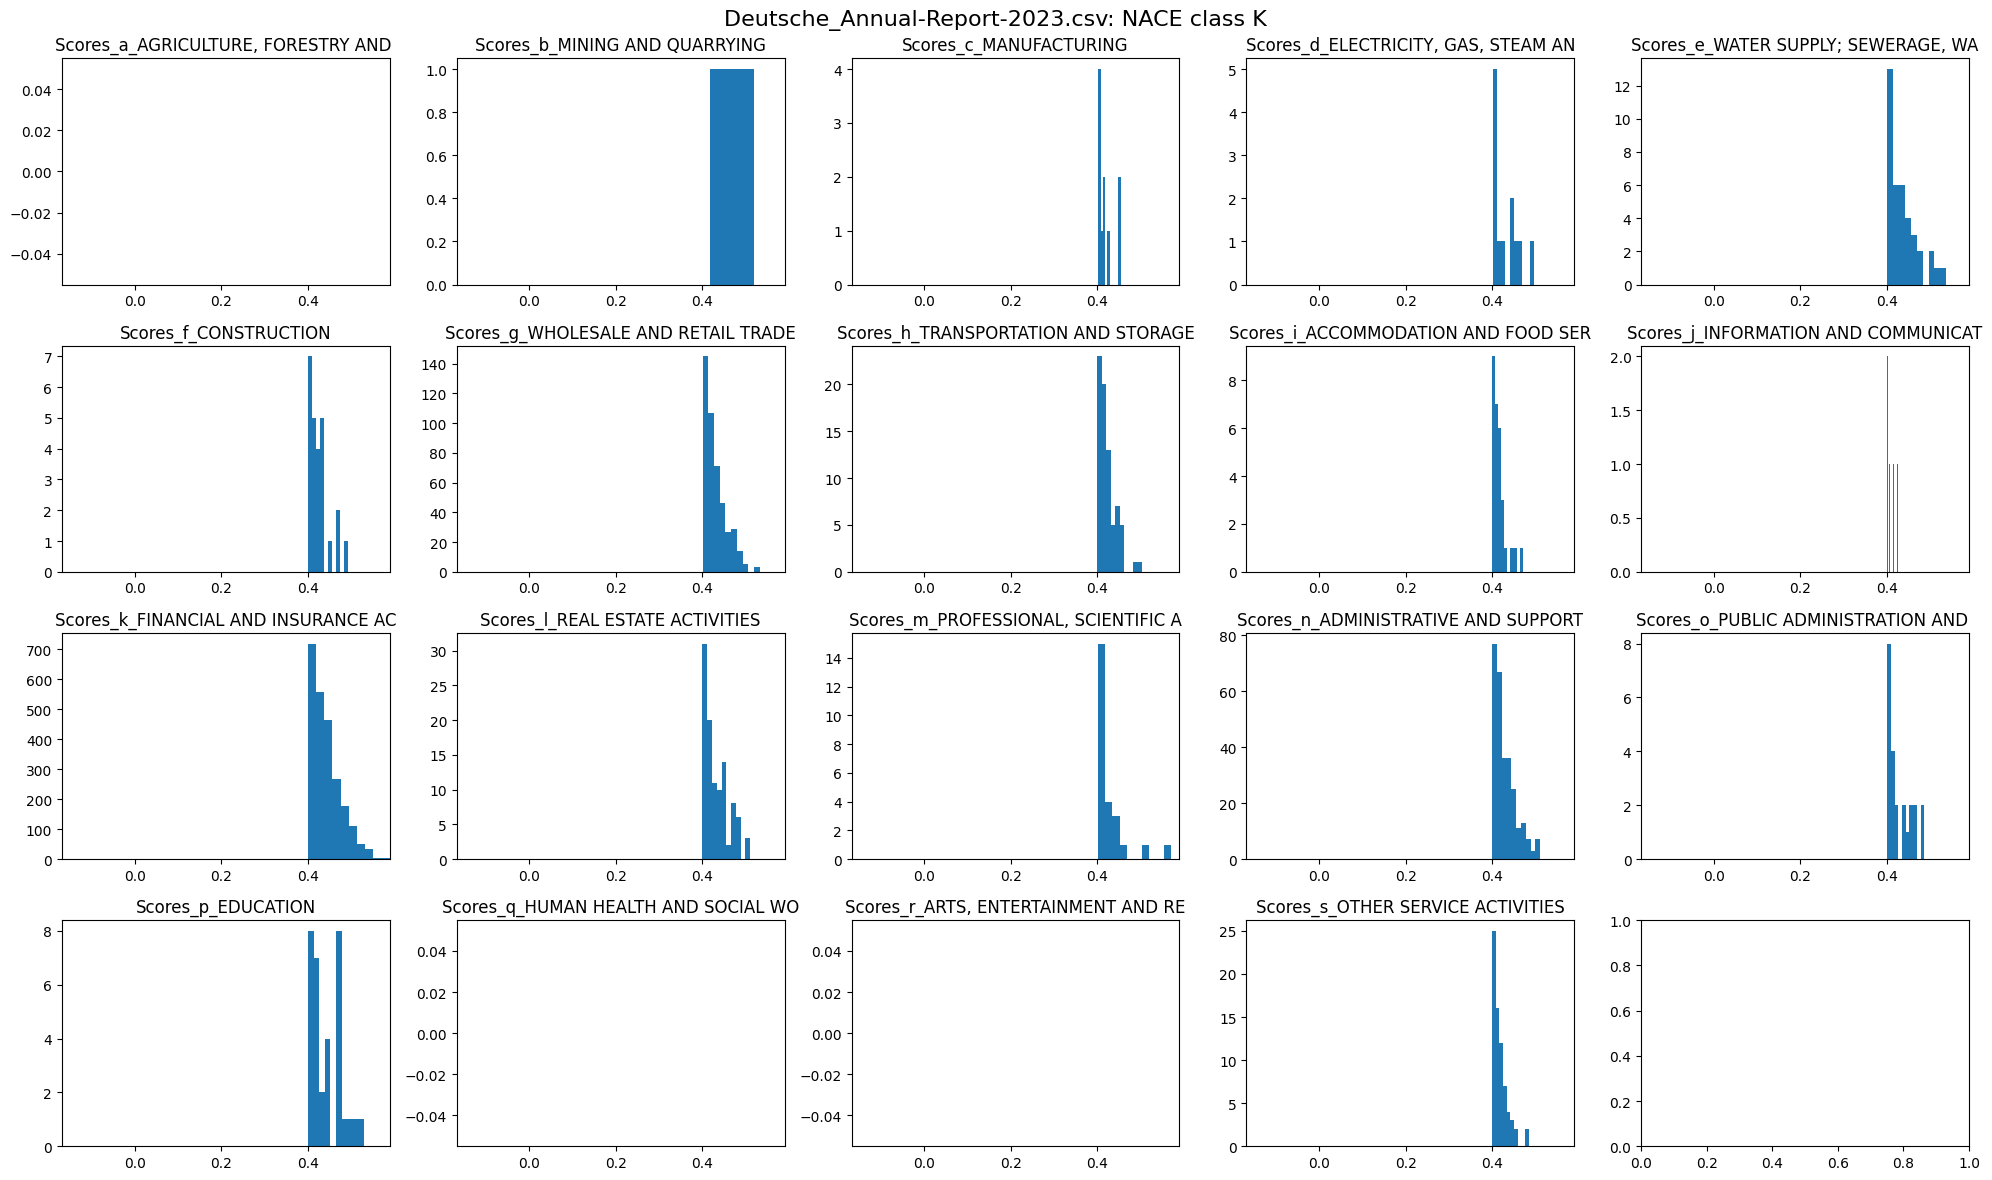

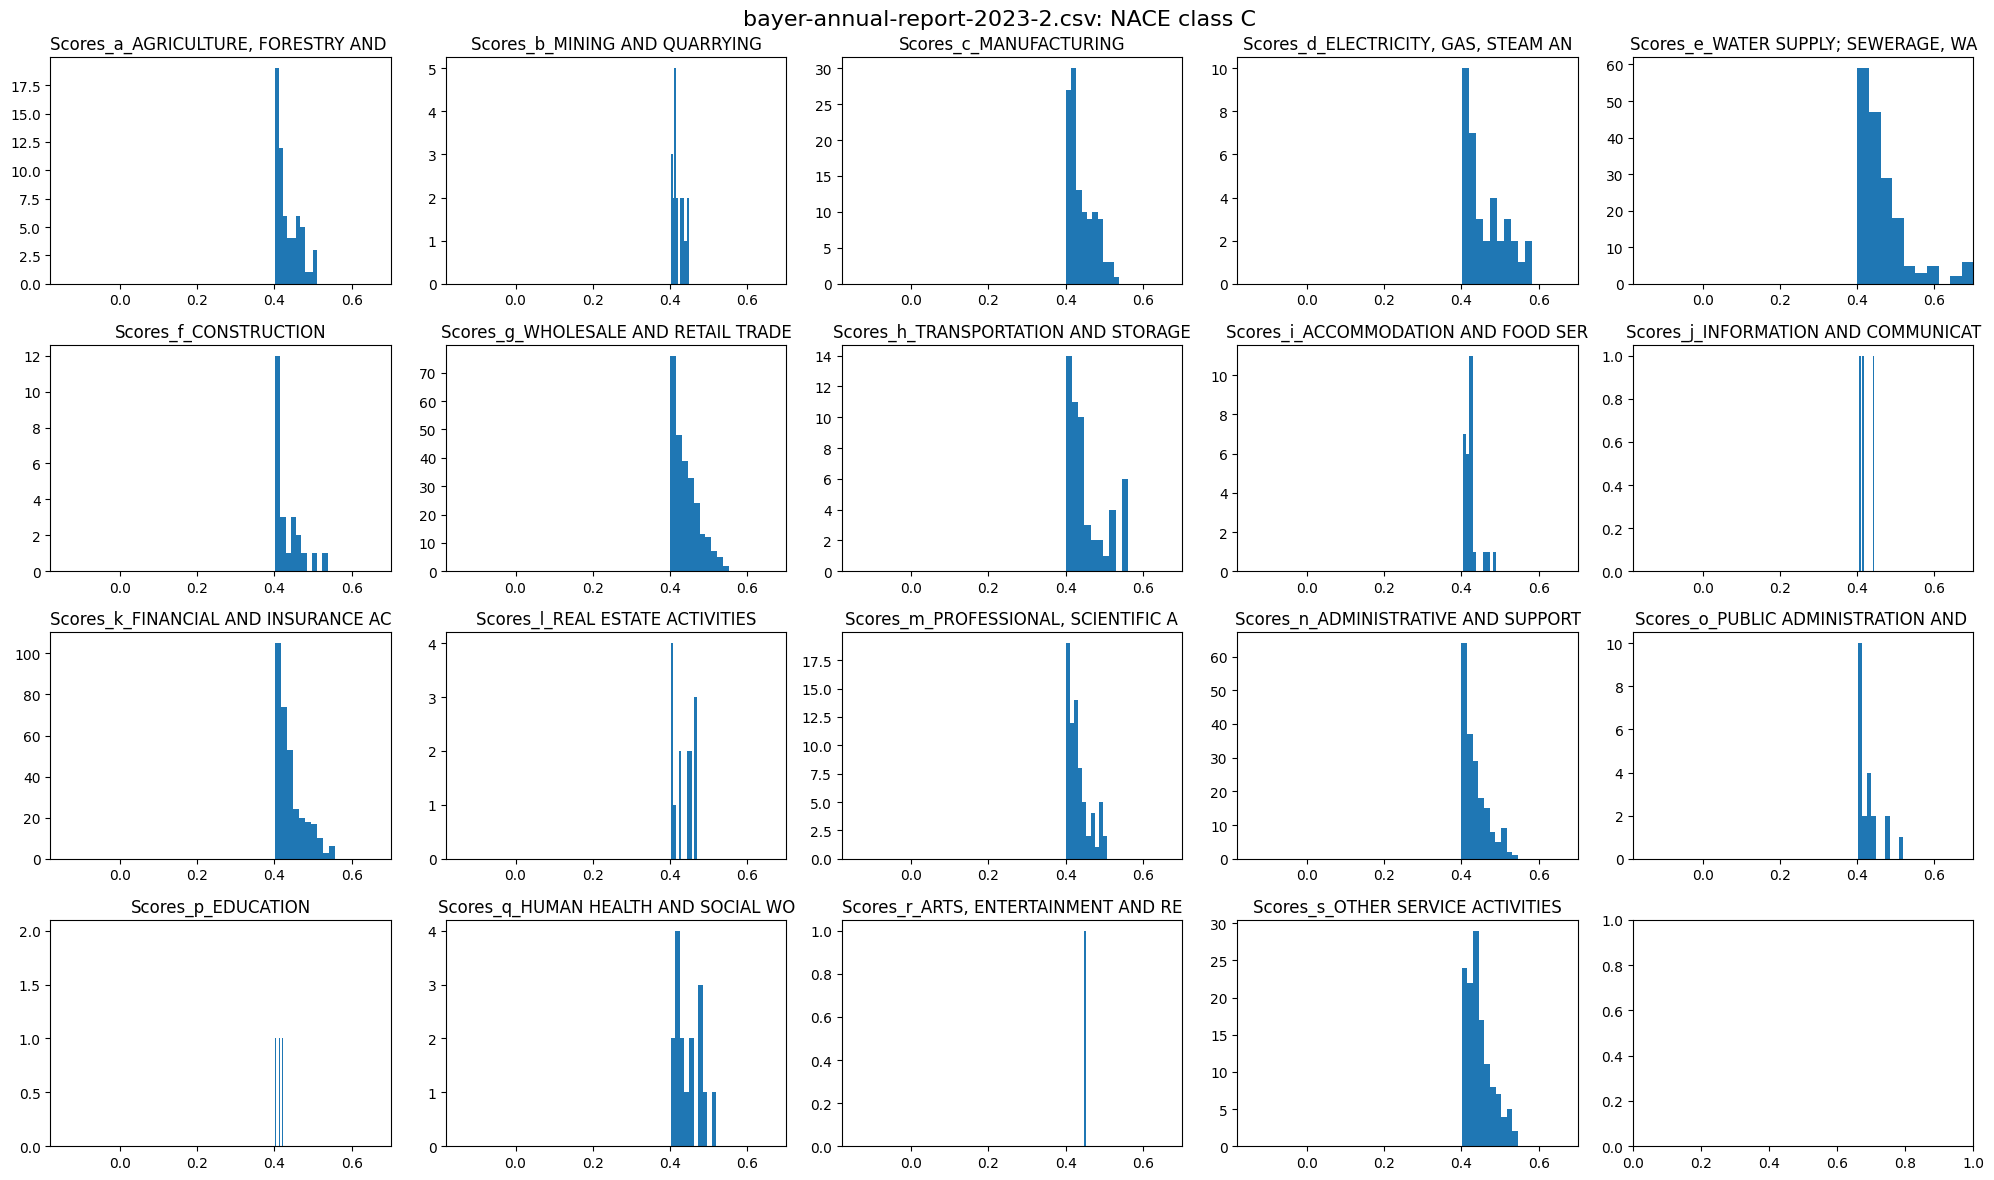

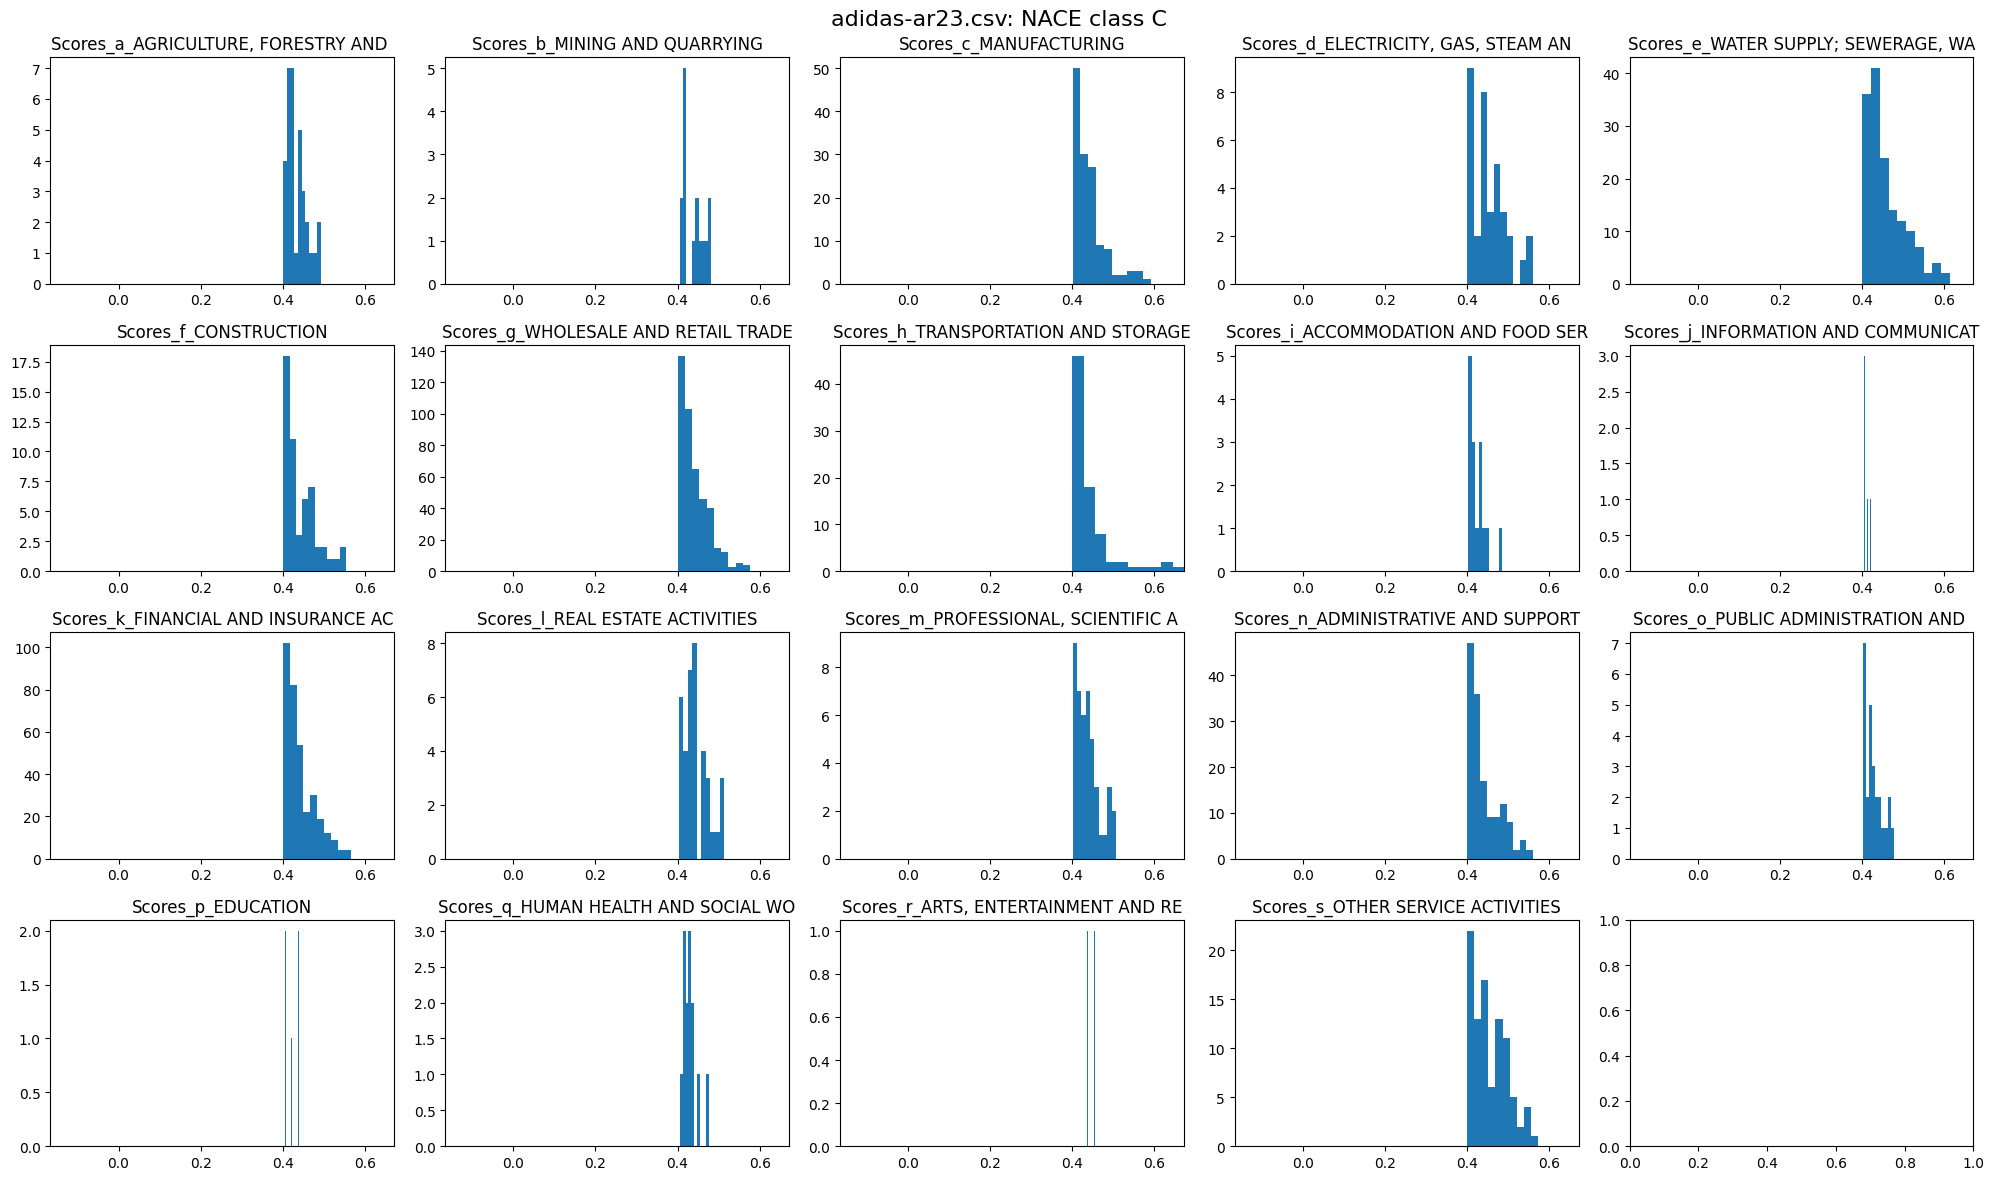

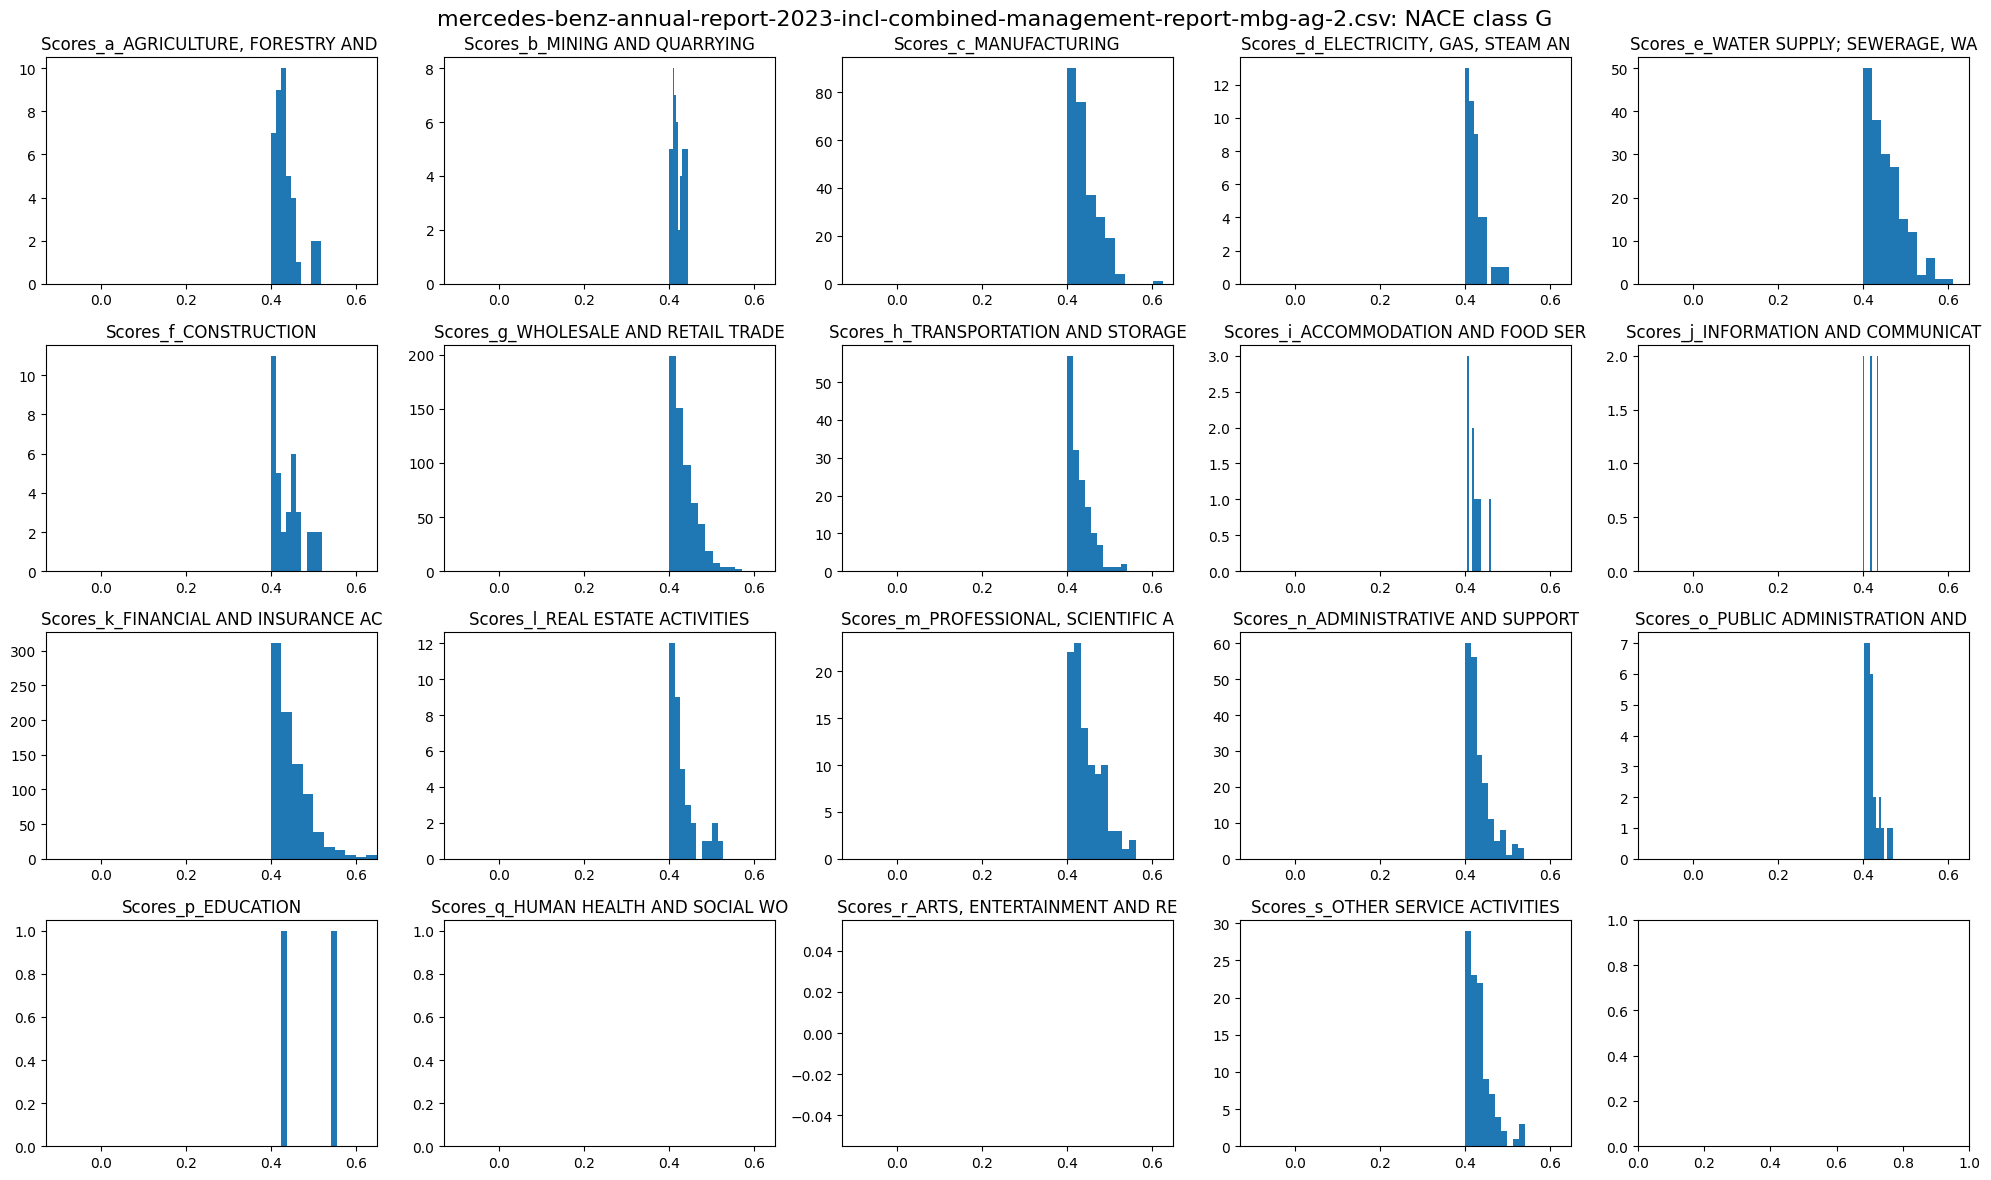

In [37]:
for i in range(len(df_paragraph_similarities)):
    analysis_functions.plot_similarity_distributions(df_paragraph_similarities[i][1], cos_threshold, NACE_codes, df_paragraph_similarities[i][0])

### Plot Number sentences 

/Users/hendrikweichel/projects/NaceCodeClassification/nace_report_topic_analysis_3/analysis_functions.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_temp.columns, rotation=90)
/Users/hendrikweichel/projects/NaceCodeClassification/nace_report_topic_analysis_3/analysis_functions.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_temp.columns, rotation=90)
/Users/hendrikweichel/projects/NaceCodeClassification/nace_report_topic_analysis_3/analysis_functions.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_temp.columns, rotation=90)
/Users/hendrikweichel/projects/NaceCodeClassification/nace_report_topic_analysis_3/analysis_functions.py:46: UserWarning: set_ticklabels

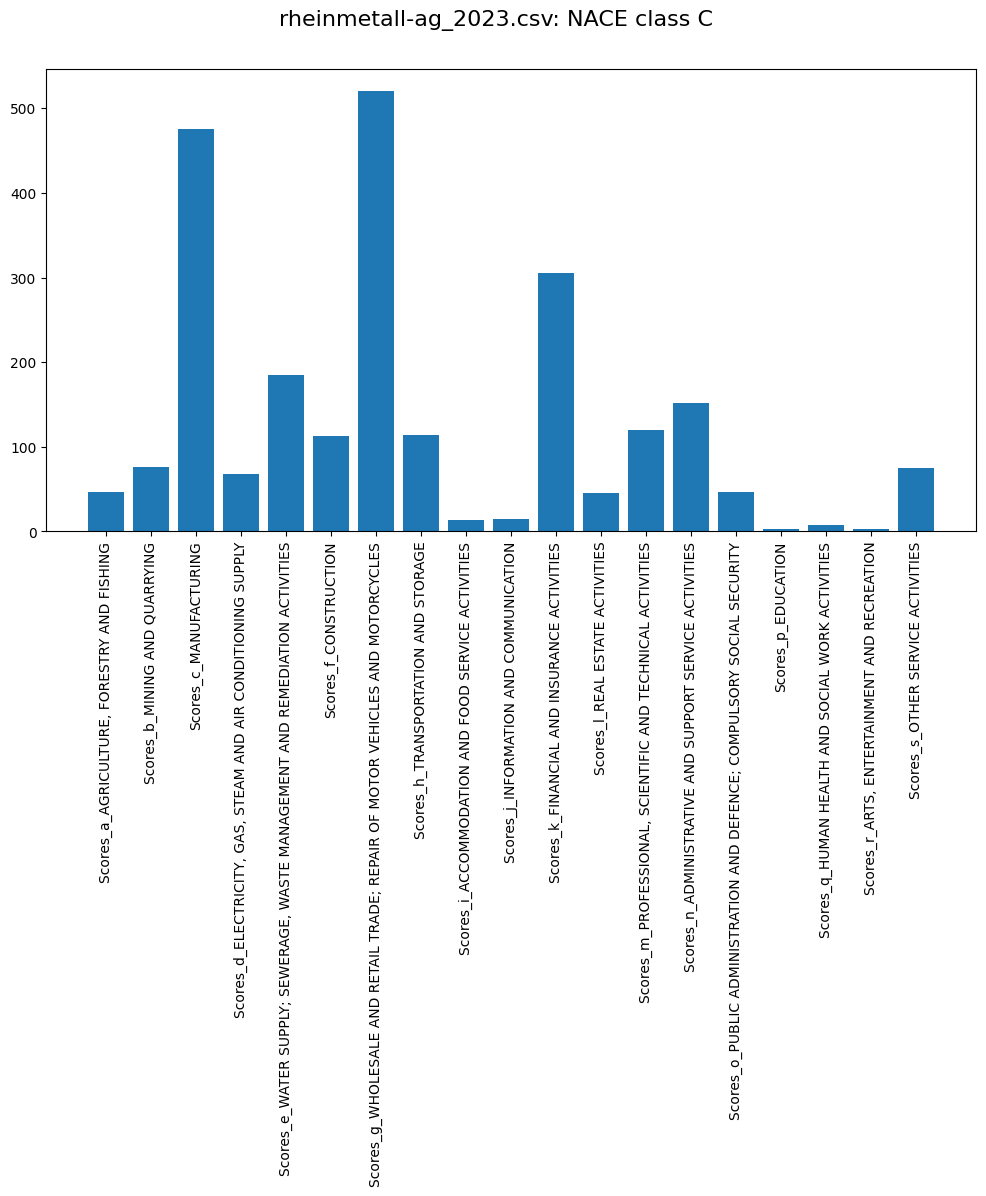

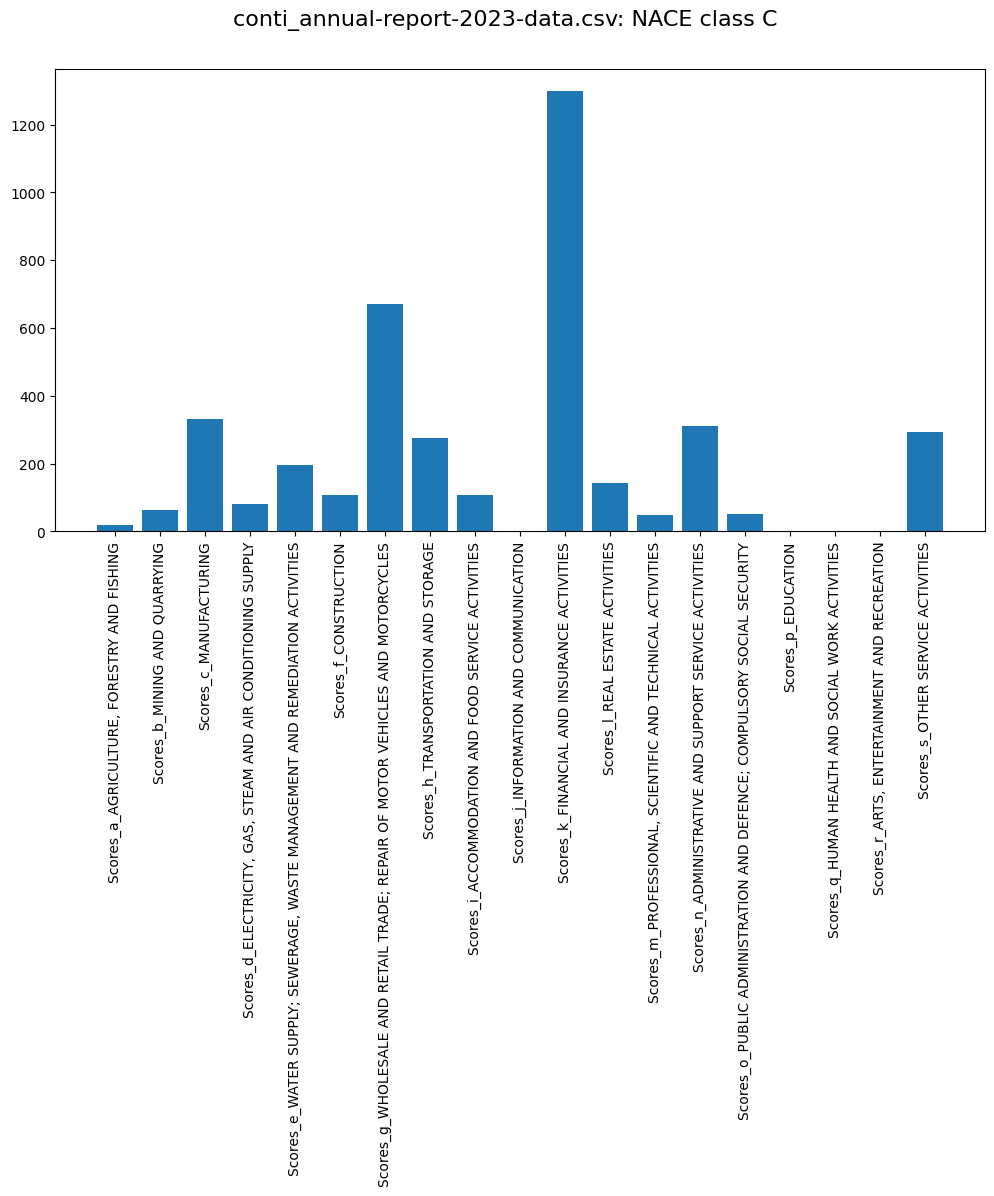

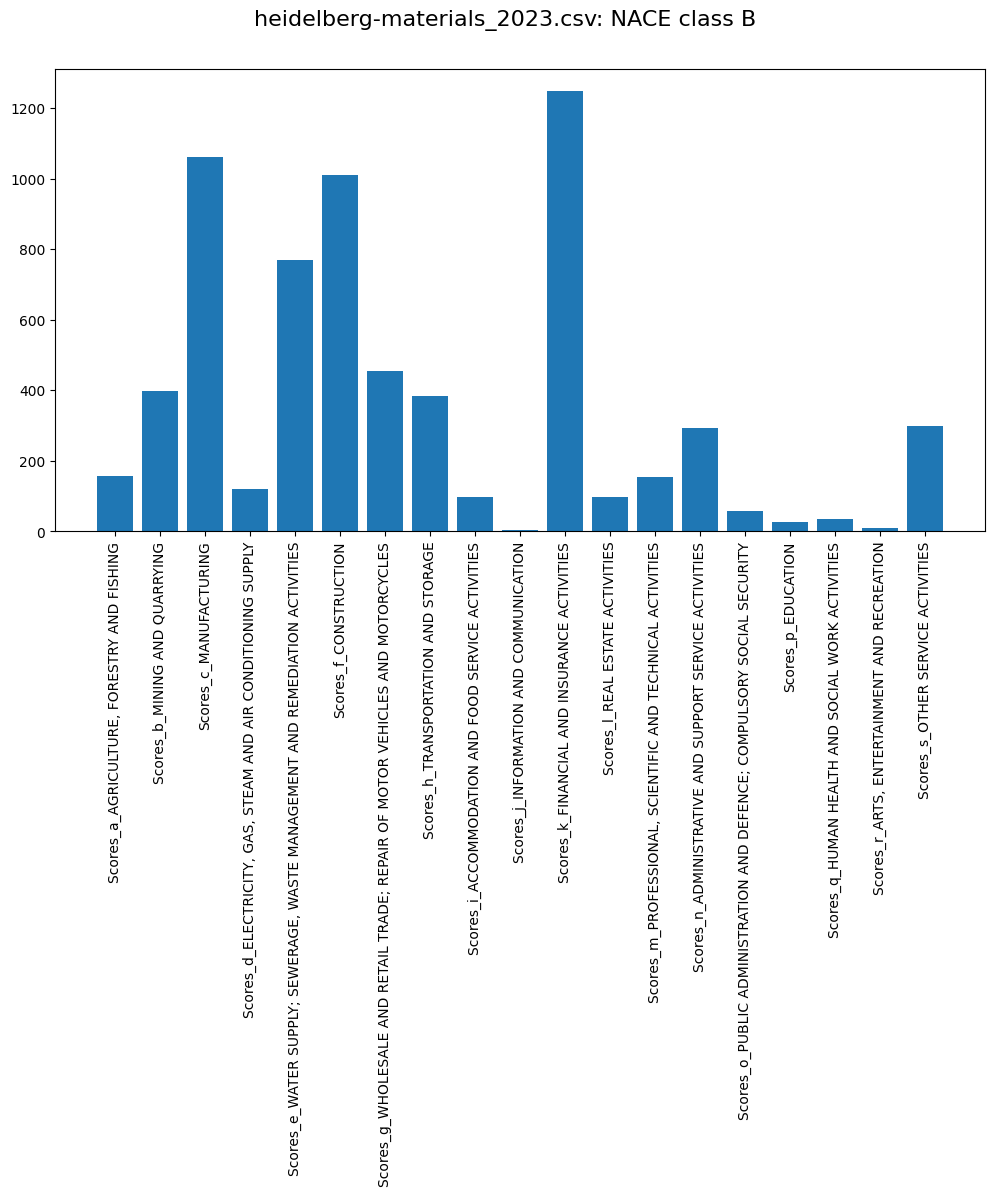

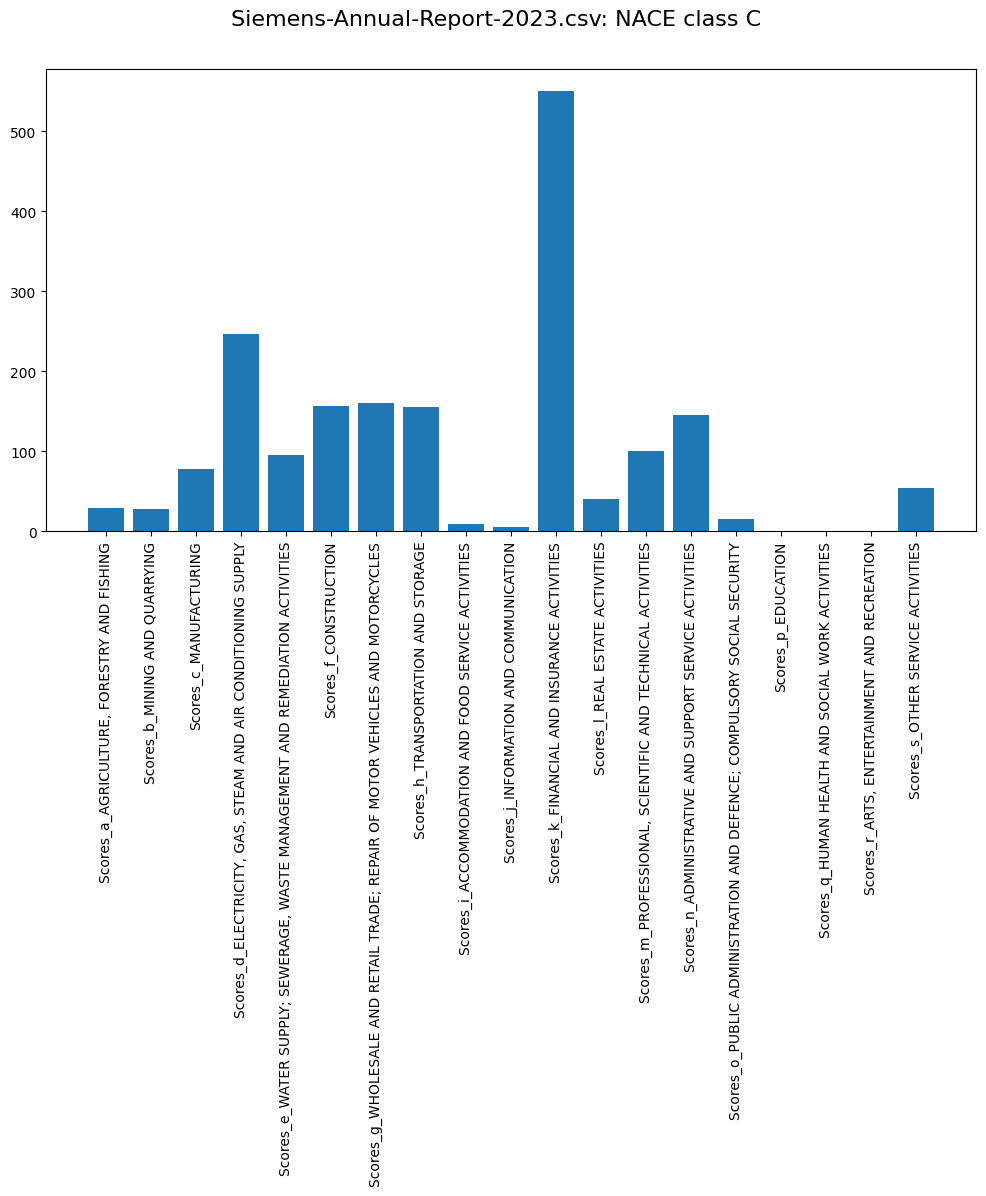

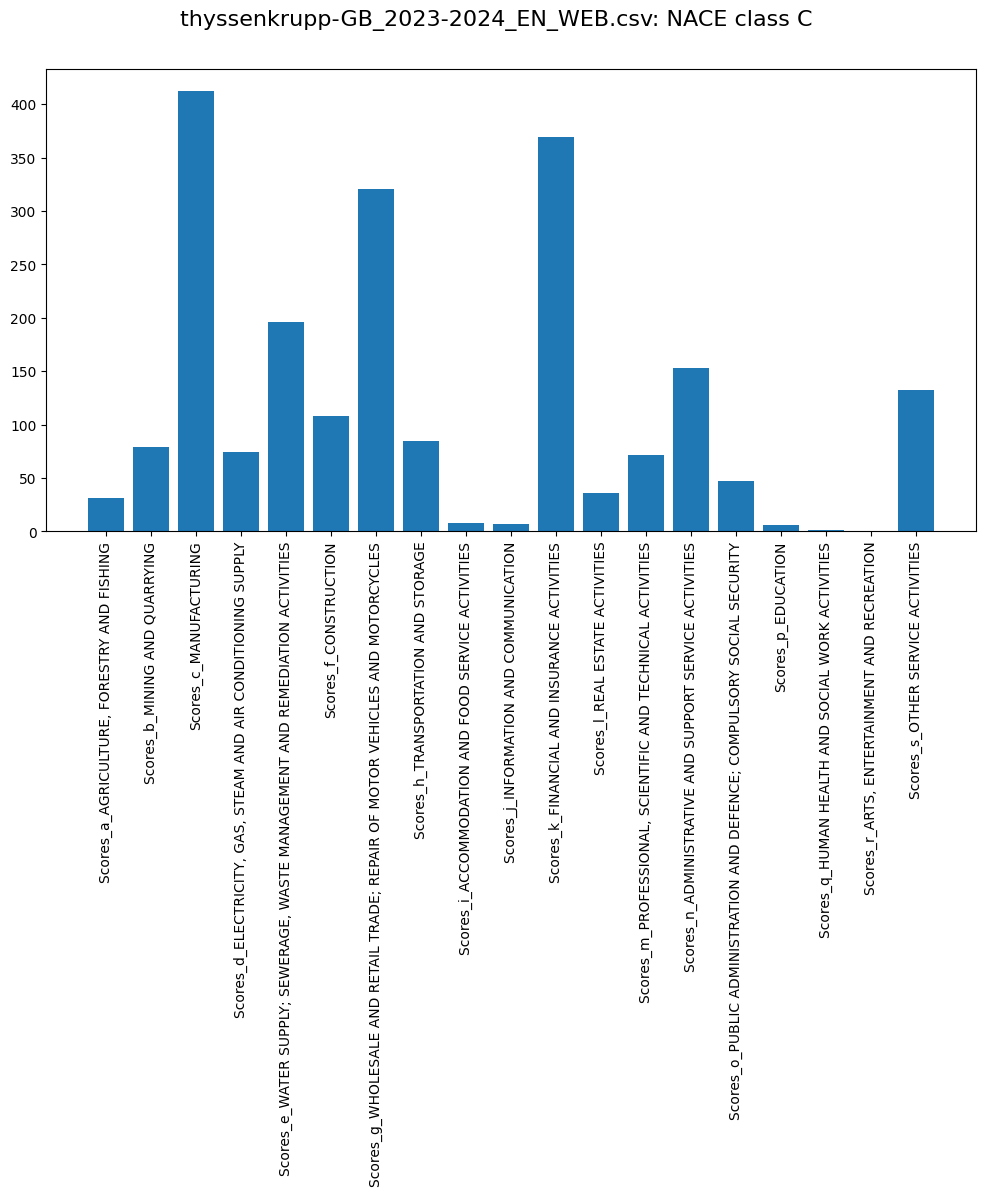

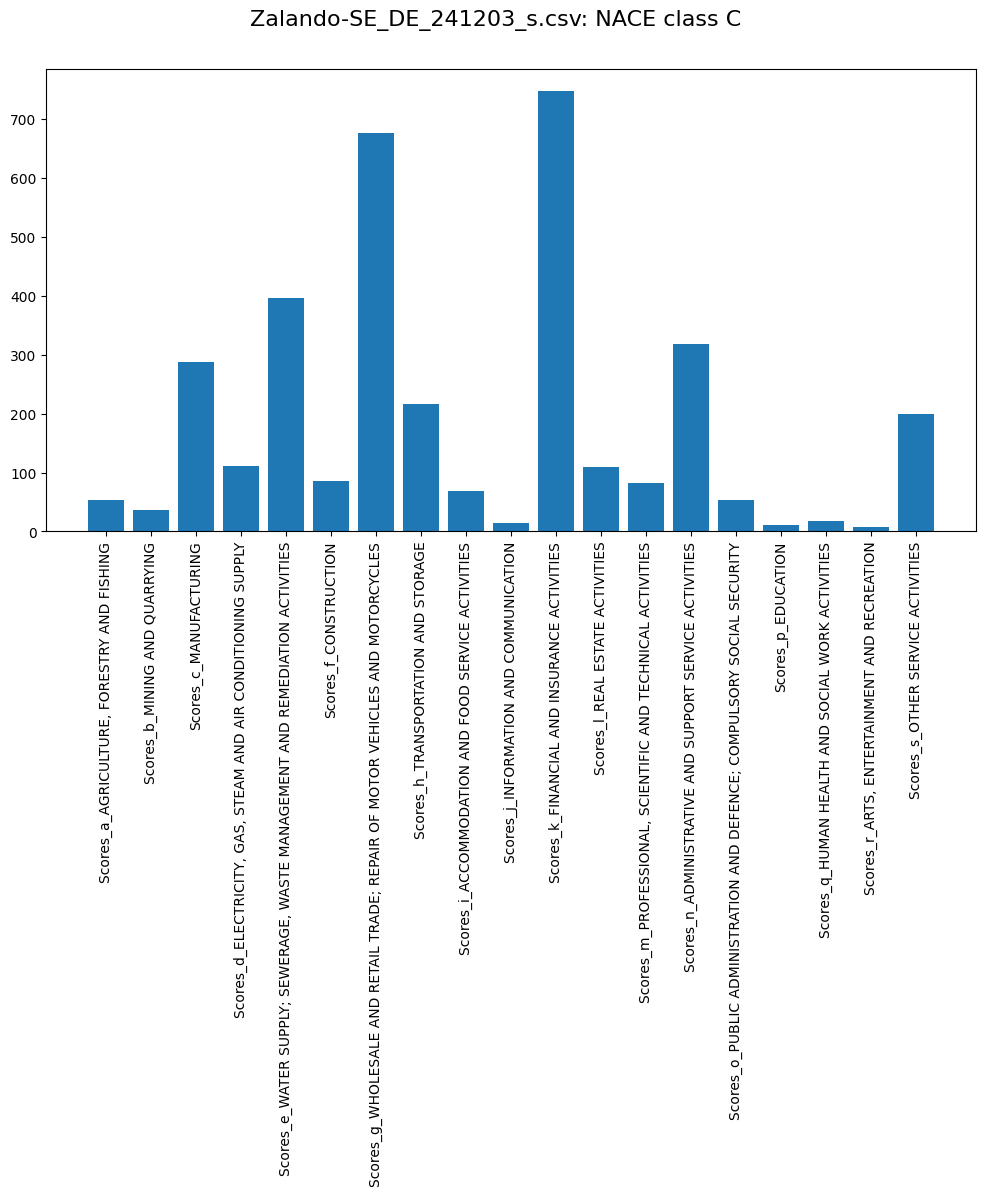

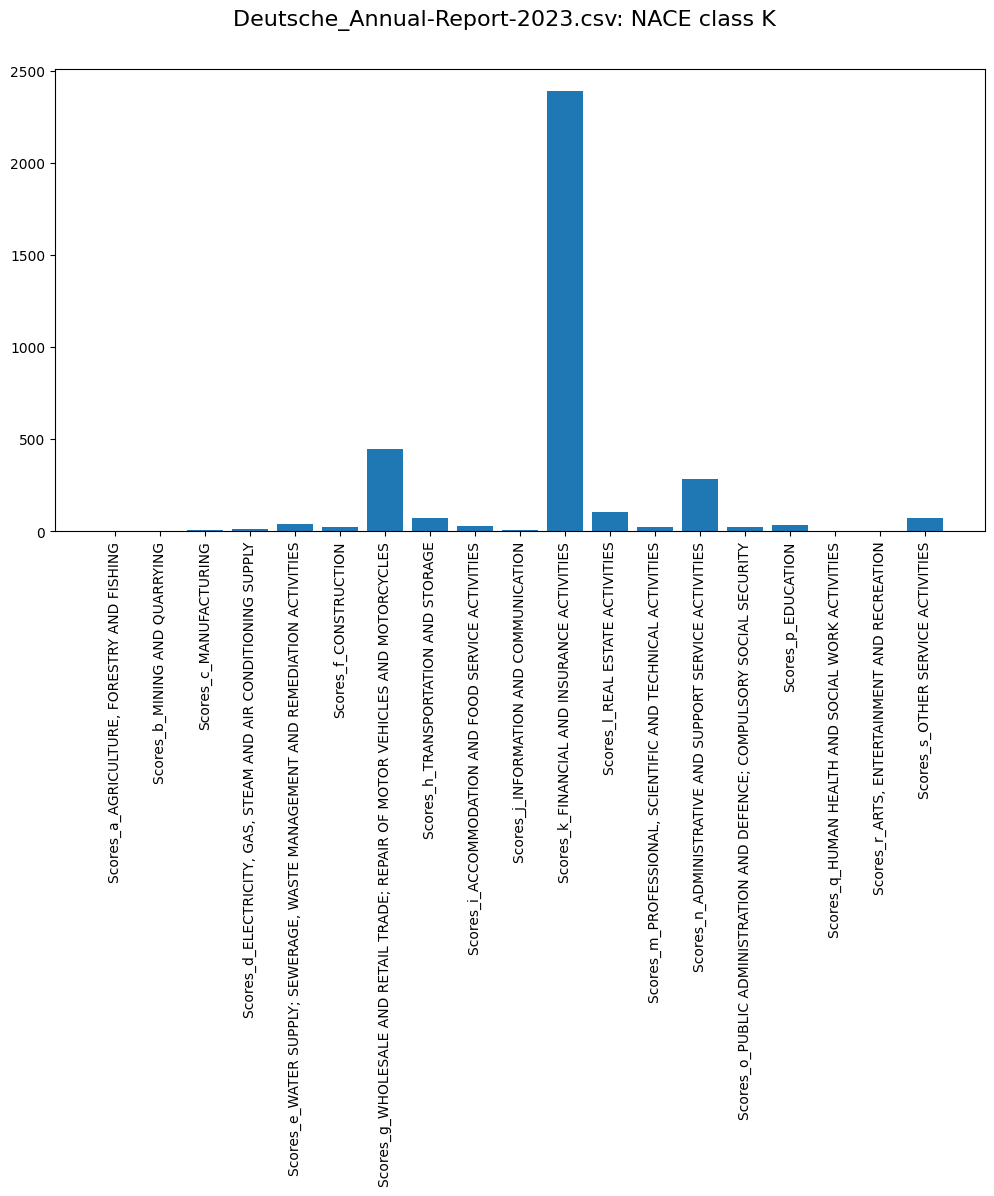

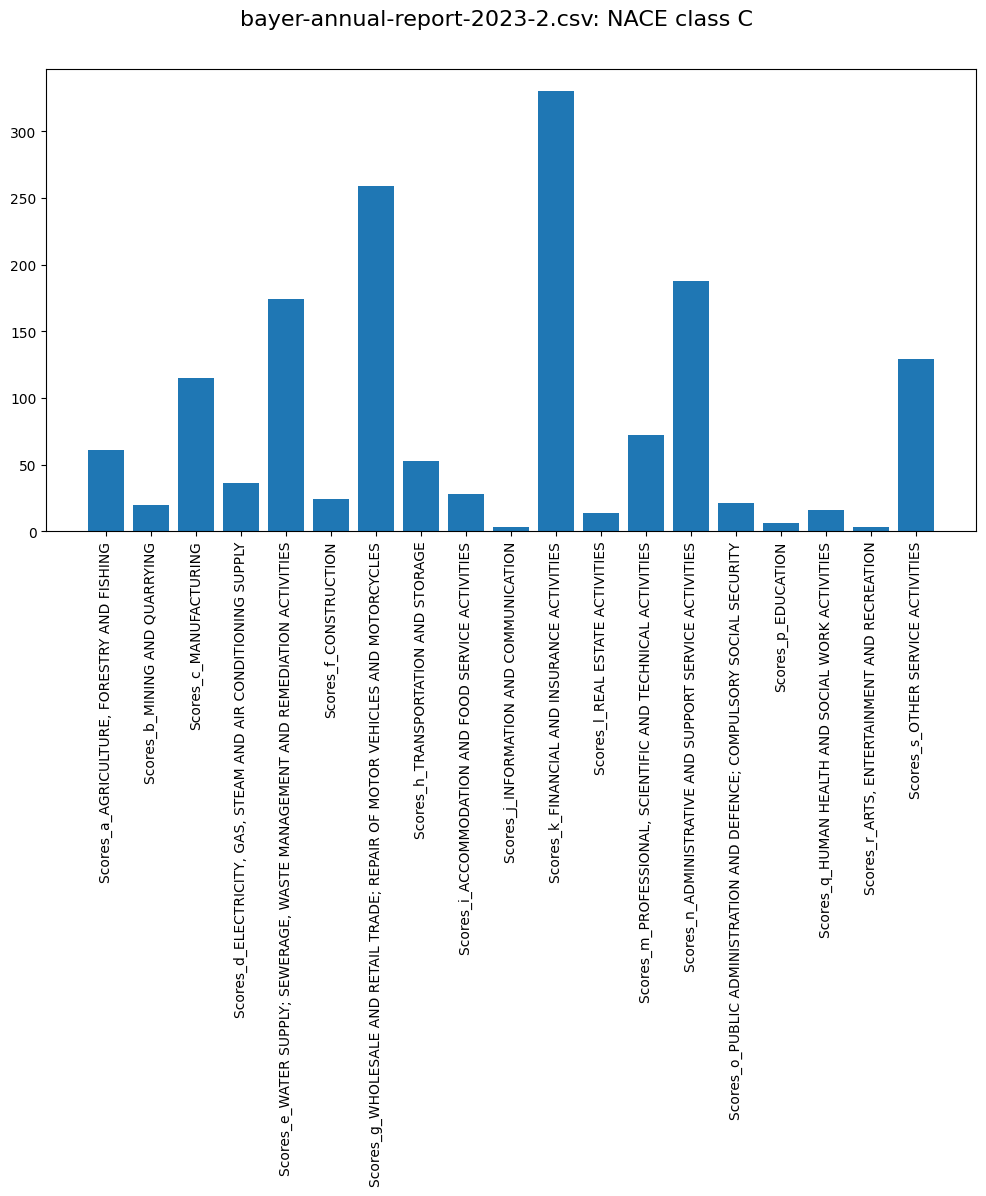

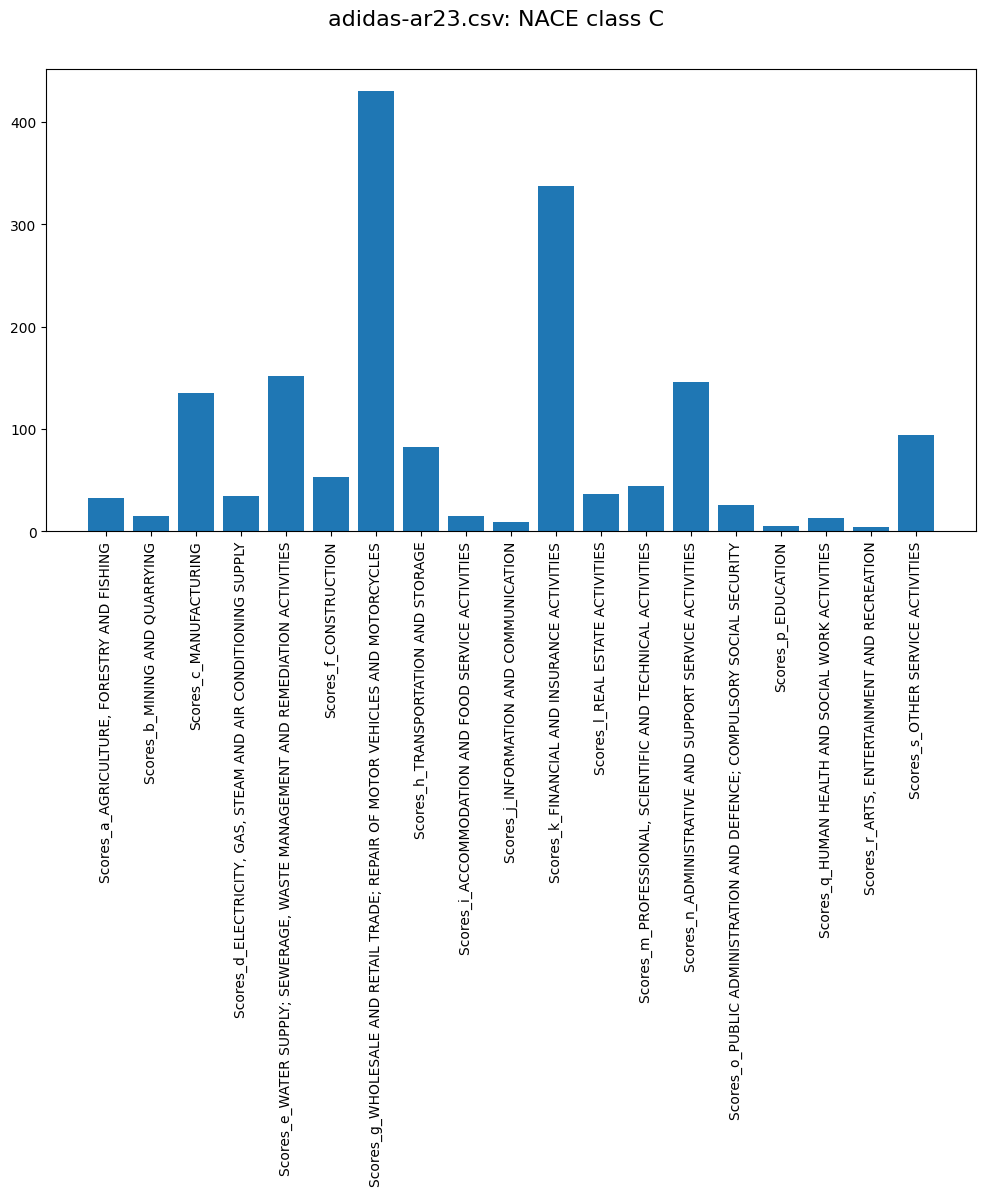

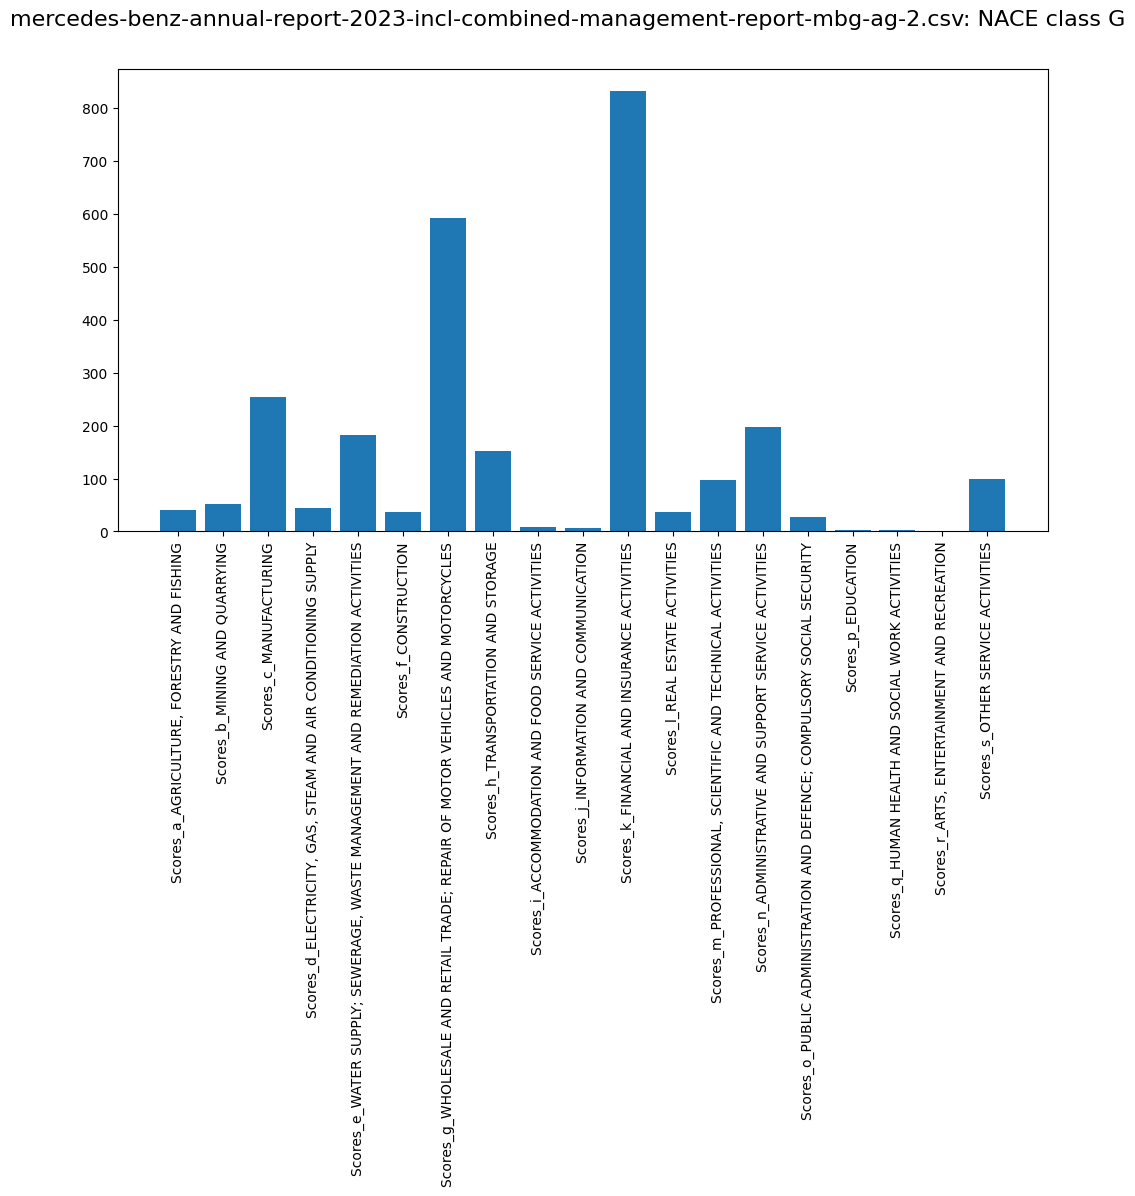

In [38]:
for i in range(len(df_paragraph_similarities)):
    analysis_functions.plot_nbr_threshold(df_paragraph_similarities[i][1], cos_threshold, NACE_codes, df_paragraph_similarities[i][0])